# Final Task - Credit Risk Prediction

# Import Dataset

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# 2. Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Collection

In [ ]:
# 3. Load dataset
file = '/content/drive/MyDrive/Colab Notebooks/Dataset/IDX Partners/loan_data_2007_2014.csv'
df = pd.read_csv(file)

<ipython-input-3-022cdea20620>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [ ]:
# Drop the column "Unnamed: 0"
df.drop(columns=['Unnamed: 0'], inplace=True)

# Data Understanding

## Descriptive Statistics

In [ ]:
# 4. Data Understanding
# Describe dataset
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


id     member_id      loan_amnt    funded_amnt  \
count  4.662850e+05  4.662850e+05  466285.000000  466285.000000   
mean   1.307973e+07  1.459766e+07   14317.277577   14291.801044   
std    1.089371e+07  1.168237e+07    8286.509164    8274.371300   
min    5.473400e+04  7.047300e+04     500.000000     500.000000   
25%    3.639987e+06  4.379705e+06    8000.000000    8000.000000   
50%    1.010790e+07  1.194108e+07   12000.000000   12000.000000   
75%    2.073121e+07  2.300154e+07   20000.000000   20000.000000   
max    3.809811e+07  4.086083e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    466285.000000  466285.000000  466285.000000  4.662810e+05   
mean      14222.329888      13.829236     432.061201  7.327738e+04   
std        8297.637788       4.357587     243.485550  5.496357e+04   
min           0.000000       5.420000      15.670000  1.896000e+03   
25%        8000.000000      10.990000     256.690000  4.500000e+04   
50%       12000.000000      13.660000     379.890000  6.300000e+04   
75%       19950.000000      16.490000     566.580000  8.896000e+04   
max       35000.000000      26.060000    1409.990000  7.500000e+06   

                 dti    delinq_2yrs  ...  total_bal_il  il_util  open_rv_12m  \
count  466285.000000  466256.000000  ...           0.0      0.0          0.0   
mean       17.218758       0.284678  ...           NaN      NaN          NaN   
std         7.851121       0.797365  ...           NaN      NaN          NaN   
min         0.000000       0.000000  ...           NaN      NaN          NaN   
25%        11.360000       0.000000  ...           NaN      NaN          NaN   
50%        16.870000       0.000000  ...           NaN      NaN          NaN   
75%        22.780000       0.000000  ...           NaN      NaN          NaN   
max        39.990000      29.000000  ...           NaN      NaN          NaN   

       open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
count          0.0         0.0       0.0      3.960090e+05     0.0   
mean           NaN         NaN       NaN      3.037909e+04     NaN   
std            NaN         NaN       NaN      3.724713e+04     NaN   
min            NaN         NaN       NaN      0.000000e+00     NaN   
25%            NaN         NaN       NaN      1.350000e+04     NaN   
50%            NaN         NaN       NaN      2.280000e+04     NaN   
75%            NaN         NaN       NaN      3.790000e+04     NaN   
max            NaN         NaN       NaN      9.999999e+06     NaN   

       total_cu_tl  inq_last_12m  
count          0.0           0.0  
mean           NaN           NaN  
std            NaN           NaN  
min            NaN           NaN  
25%            NaN           NaN  
50%            NaN           NaN  
75%            NaN           NaN  
max            NaN           NaN  

[8 rows x 52 columns]

1. **Loan Amount Distribution:**
   - The average loan amount (**loan_amnt**) is approximately **14,317**, with a standard deviation of about **8,287**.
   - The loan amounts range from a minimum of **500** to a maximum of **35,000**.

2. **Average Interest Rate:**
   - The average interest rate (**int_rate**) is approximately **13.83%**, with variations between **5.42%** and **26.06%**.

3. **Average Annual Income:**
   - The average annual income (**annual_inc**) is around **73,277**, with a standard deviation of about **54,963**.
   - The annual income ranges from a minimum of **1,896** to a maximum of **7,500,000**.

4. **Debt-to-Income Ratio:**
   - The debt-to-income ratio (**dti**) has an average of about **17.22**, with a standard deviation of around **7.85**.
   - This value reflects the ratio of total debt to income.

5. **Number of Years Delinquent (delinq_2yrs):**
   - The average number of years delinquent is about **0.28** years, with most customers having **0** years of delinquency.

6. **Data Variability:**
   - The significant standard deviation for some variables indicates that the data has considerable variation.


## Dataset Structure

In [ ]:
# Review dataset structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

1. **Number of Rows and Columns**:
   - The dataset consists of 466,285 rows and 74 columns.

2. **Data Types**:
   - There are three main data types in this dataset: **float64**, **int64**, and **object**.

3. **Incomplete Data**:
   - Some columns have non-null values that are less than the total number of rows, indicating incomplete or missing data. For example, columns like **emp_title**, **emp_length**, **annual_inc**, **delinq_2yrs**, **revol_util**, and others have fewer non-null values than the total number of rows.

4. **Data Type Variability**:
   - Columns with **float64** and **int64** data types are dominated by numerical data such as loan amount, interest rate, and payment amounts. In contrast, columns with **object** data types may include categories or text such as credit grade, company name, and address.

5. **Columns with Null Values**:
   - Some columns have a significant number of null values, such as **desc**, **mths_since_last_delinq**, **mths_since_last_record**, and others. These require special handling during further analysis.

6. **Unused Columns**:
   - Some columns like **annual_inc_joint**, **dti_joint**, **verification_status_joint**, and others appear to have no data (all null), which may be irrelevant or unused in the analysis.


In [ ]:
# Analysis of data types distribution
data_types = df.dtypes

# Compute the distribution of data types
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Show information
print("Analysis of Data Types Distribution:")
print("Numeric Columns:", len(numeric_columns))
print("Numeric Columns:", (numeric_columns))
print("\nCategorical Columns:", len(categorical_columns))
print("\nCategorical Columns:", print(categorical_columns))
print("Other Columns:", len(df.columns) - len(numeric_columns) - len(categorical_columns))

Analysis of Data Types Distribution:
Numeric Columns: 52
Numeric Columns: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'to

## Check for duplicates

In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows in the dataset:", duplicate_rows.shape[0])

Number of duplicate rows in the dataset: 0


- There are no duplicate rows in the dataset, indicating that each row of data is unique.

## Check for missing values

In [ ]:
# Count the number of columns with missing values
columns_with_missing = df.isnull().any().sum()

# Display the number of columns with missing values
print("Number of columns with missing values:", columns_with_missing)

Number of columns with missing values: 40


In [ ]:
# Check for missing values and sort them in descending order
missing_values_sorted = df.isnull().sum().sort_values(ascending=False)
print(missing_values_sorted.head(60))

inq_last_12m                   466285
verification_status_joint      466285
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
dti_joint                      466285
total_bal_il                   466285
annual_inc_joint               466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m                    466285
max_bal_bc                     466285
all_util                       466285
inq_fi                         466285
total_cu_tl                    466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340304
mths_since_last_delinq         250351
next_pymnt_d                   227214
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
emp_title                       27588
emp_length  

- There are many missing values (NaN) across various columns.
- Some columns have a significant number of missing values, such as `annual_inc_joint`, `dti_joint`, `verification_status_joint`, and others. This requires special handling in further analysis.


## Display dataset

In [ ]:
# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
df.head()


First few rows of the dataset:


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     10.65       162.87     B        B2  ...          NaN     NaN   
1     15.27        59.83     C        C4  ...          NaN     NaN   
2     15.96        84.33     C        C5  ...          NaN     NaN   
3     13.49       339.31     C        C1  ...          NaN     NaN   
4     12.69        67.79     B        B5  ...          NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        NaN      NaN              NaN    NaN   
1         NaN          NaN        NaN      NaN              NaN    NaN   
2         NaN          NaN        NaN      NaN              NaN    NaN   
3         NaN          NaN        NaN      NaN              NaN    NaN   
4         NaN          NaN        NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 74 columns]

## Unique and frequency values

### Numeric Variable

In [ ]:
# Unique and frequency values
print("\nNumeric Unique Values:")
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{column}: {df[column].unique()}")


Numeric Unique Values:
id: [1077501 1077430 1077175 ... 9584776 9604874 9199665]
member_id: [ 1296599  1314167  1313524 ... 11436914 11457002 11061576]
loan_amnt: [ 5000  2500  2400 ... 33675 27775 33175]
funded_amnt: [ 5000  2500  2400 ... 27775 33175 31725]
funded_amnt_inv: [ 4975.  2500.  2400. ... 30425. 33125. 33625.]
int_rate: [10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14
 11.11 10

In [ ]:
print("\nNumeric Value Frequencies:")
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{column}:\n{df[column].value_counts()}")


Numeric Value Frequencies:
id:
id
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: count, Length: 466285, dtype: int64
member_id:
member_id
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: count, Length: 466285, dtype: int64
loan_amnt:
loan_amnt
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: count, Length: 1352, dtype: int64
funded_amnt:
funded_amnt
10000    32930
12000    25426
15000    23370
20000    22571
35000    16458
         ...  
34075        1
31475        1
33400        1
34825        1
34775        1
Name: count, Length: 1354, dtype: int64
funded_amnt_inv:
funded_amnt_inv
10000.000000    28683
12000.000000    21732
15000.000000    194

1. **Loan Amount Distribution Based on Loan Amount (loan_amnt):** A 10,000 loan is the most common, followed by loans of 12,000 and 15,000. This indicates that lower loan amounts tend to be more popular among applicants.

2. **Interest Rate (int_rate):** The most common interest rate is around **12.99%**, followed by **10.99%** and **15.61%**. This provides an overview of the range of interest rates typically offered to applicants.

3. **Annual Income Distribution (annual_inc):** An annual income of **60,000** is the most common, followed by **50,000** and **65,000**. This shows the common income profile of applicants.

4. **Debt-to-Income Ratio (dti):** The most common values for the debt-to-income ratio are around **14.40**, **19.20**, and **12.00**. This can provide information on how much of the applicant's income is allocated to debt payments.

5. **Number of Late Payments in the Last 2 Years (delinq_2yrs):** The majority of applicants (around **382,954**) have no late payments in the last 2 years, but some have up to **29** late payments.

6. **Number of Public Records (pub_rec):** The majority of applicants (around **404,893**) have no public records, but some have up to **40** public records.

7. **Total Available Credit (total_rev_hi_lim):** The most common highest credit limit is **15,000**, **13,500**, and **10,000**. This can provide an insight into the amount of credit available to applicants.

8. **Number of Loans Delinquent in the Last 12 Months (collections_12_mths_ex_med):** The majority of applicants (around **462,226**) have no loans delinquent in the last 12 months.


### Categorical Variable

In [ ]:
print("\nCategorical Unique Values:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")


Categorical Unique Values:
term: [' 36 months' ' 60 months']
grade: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade: ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
emp_title: [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']
emp_length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status: ['Verified' 'Source Verified' 'Not Verified']
issue_d: ['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Fe

In [ ]:
print("\nCategorical Value Frequencies:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}:\n{df[column].value_counts()}")


Categorical Value Frequencies:
term:
term
 36 months    337953
 60 months    128332
Name: count, dtype: int64
grade:
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64
sub_grade:
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64
emp_title:
emp_title
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC  

1. **Loan Term (term):**
   - The majority of loans have a term of **36 months**, with a small portion having a term of **60 months**. This indicates the preference of the majority of borrowers for shorter loan terms.

2. **Loan Grade and Subgrade:**
   - The majority of loans have a grade of **B** and **C**, with subgrades **B3** and **B4** being the most common. This may reflect a diverse risk profile among loan applicants.

3. **Borrower's Occupation (emp_title) and Employment Length (emp_length):**
   - The majority of borrowers are **teachers**, **managers**, or **registered nurses**, with most having **more than 10 years** of work experience. This indicates that the majority of applicants are workers with solid work experience.

4. **Home Ownership Status (home_ownership):**
   - The majority of applicants own homes with a **mortgage**, followed by those who **rent**. Only a small number own homes **outright** without a mortgage.

5. **Verification Status (verification_status):**
   - Most applicants have a **verified** or **source verified** verification status. This indicates that the majority of applicants have passed the identity and income verification process.

6. **Loan Purpose (purpose):**
   - The majority of loans are used for **debt consolidation** or **credit card payment**, followed by **home improvement** and other purposes such as **major purchases**.

7. **Loan Status (loan_status):**
   - The majority of loans are still **active (current)** or have been **fully paid**, with a small portion being **charged off** or having **late payments**.


## Define Target

- To mitigate credit risk, creditors conduct credit analysis on prospective borrowers, examining their credit history, credit scores, and the borrower's financial ability to repay the debt.
- To mitigate credit risk, creditors conduct credit analysis on prospective borrowers, examining their credit history, credit scores, and the borrower's financial ability to repay the debt.
- Therefore, the `loan_status` feature in this dataset can be used as an appropriate target feature because it reflects the borrower's ability to repay the loan or credit provided.

In [ ]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

- Current = Payments are current and within the payment timeline.
- Fully Paid = Payments have been fully paid.
- Charged Off = Loan is deemed uncollectible and has been written off.
- Late = Payments are late within a certain period.
- In Grace Period = Payments are in a grace period
- Default = Payments are defaulted.

Based on these definitions, we can define individuals as "good loan" or "bad loan" as follows:
- "good loan" refers to loans that are settled on time and in accordance with agreed term
- "Bad loan" refers to loans that cannot be settled or are settled late, even reaching default status.

# Exploratory Data Analysis (EDA) - Simple

## 1. Visualization of Numeric Variable Distributions

### Histograms and Density Plots

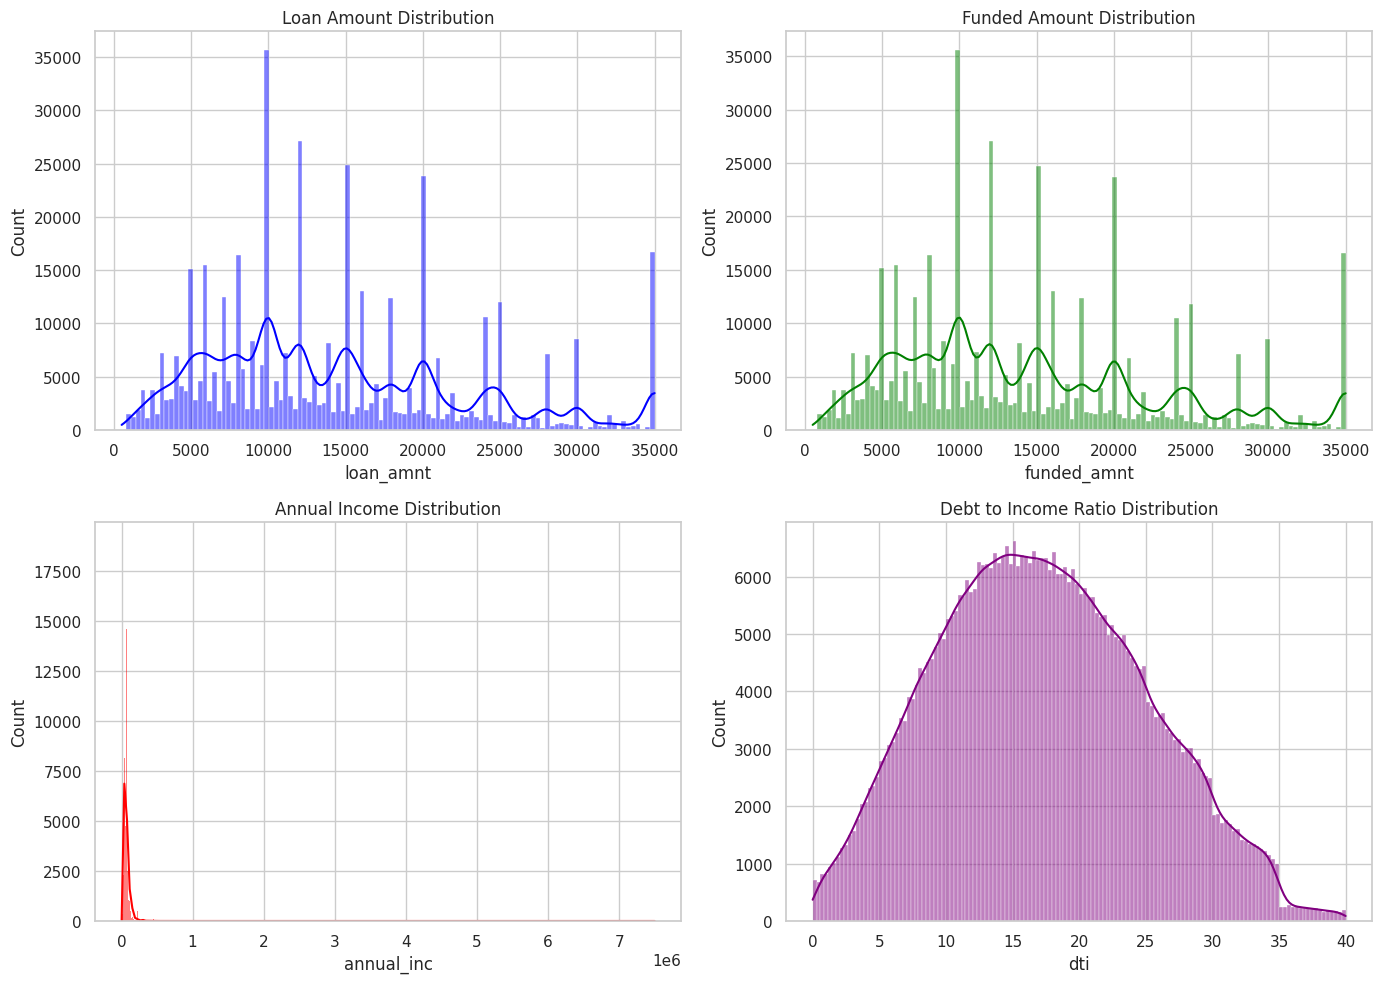

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
sns.set(style="whitegrid")

# Histograms and density plots for 'loan_amnt', 'funded_amnt', 'annual_inc', and 'dti'
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data=df, x='loan_amnt', kde=True, ax=axes[0, 0], color="blue").set(title='Loan Amount Distribution')
sns.histplot(data=df, x='funded_amnt', kde=True, ax=axes[0, 1], color="green").set(title='Funded Amount Distribution')
sns.histplot(data=df, x='annual_inc', kde=True, ax=axes[1, 0], color="red").set(title='Annual Income Distribution')
sns.histplot(data=df, x='dti', kde=True, ax=axes[1, 1], color="purple").set(title='Debt to Income Ratio Distribution')

plt.tight_layout()
plt.show()


Reasons for Column Usage:

- **loan_amnt** and **funded_amnt**: Provide insights into the requested and actual loan amounts. This analysis is crucial for understanding financial risk.
- **annual_inc** and **dti** (debt-to-income ratio): Important for analyzing borrowers' ability to repay loans.

Distribution of Loan Amount and Funding

- Histogram and density plot graphs show the distribution of loan amounts (**loan_amnt**) and funding amounts (**funded_amnt**). From these graphs, there are several peaks indicating commonly requested loan values, such as 10,000, 15,000, and 20,000, which may suggest popular or standard loan values for specific purposes.

Distribution of Income and Debt-to-Income Ratio (DTI)

- **Annual Income**: The annual income graph (**annual_inc**) indicates that most borrowers have income below 100,000, with a heavily left-skewed distribution. This suggests that the loan service is primarily used by individuals with medium to lower incomes.
- **Debt-to-Income Ratio (DTI)**: The DTI distribution resembles a normal distribution with slight right skewness, with most values ranging from 10 to 30. This indicates common levels of leverage or debt burden among borrowers.


### Boxplots for Outlier Detection

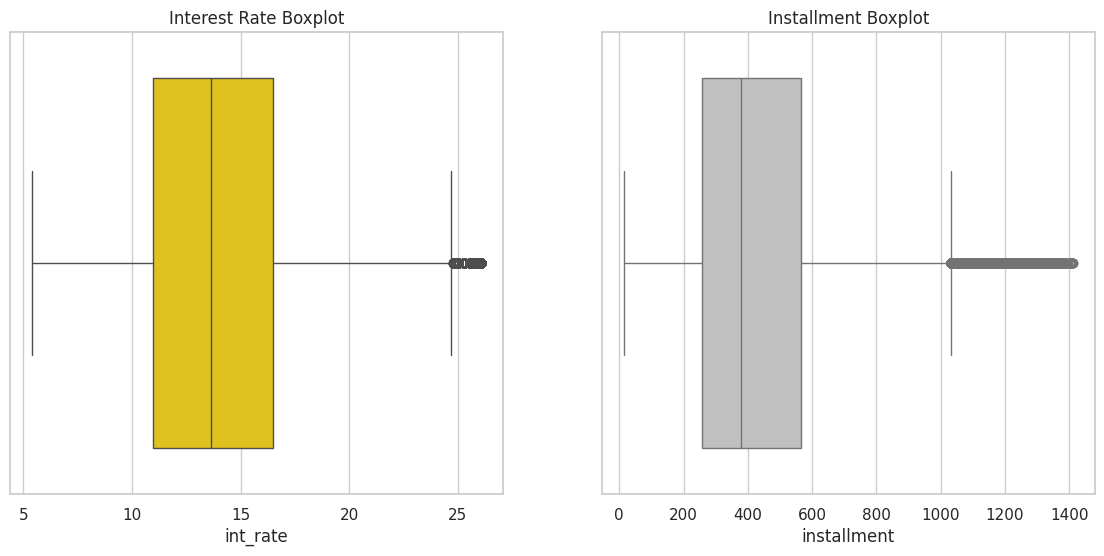

In [ ]:
# Boxplots for 'int_rate' and 'installment'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df, x='int_rate', ax=axes[0], color="gold").set(title='Interest Rate Boxplot')
sns.boxplot(data=df, x='installment', ax=axes[1], color="silver").set(title='Installment Boxplot')

plt.show()


Reasons for Column Usage:

- **int_rate** (interest rate) and **installment**: Important for assessing borrowers' monthly financial burden and default risk.

Analysis of Interest Rate and Installment

- Interest Rate and Installment: Boxplot for interest rate (**int_rate**) and installment (**installment**) shows the median and quartile range. The interest rate shows a relatively narrow variation with some high outliers, while the installment shows a wider range, consistent with the variation in loan amounts.


## 2. Analysis of Categorical Variable

### Count Plots

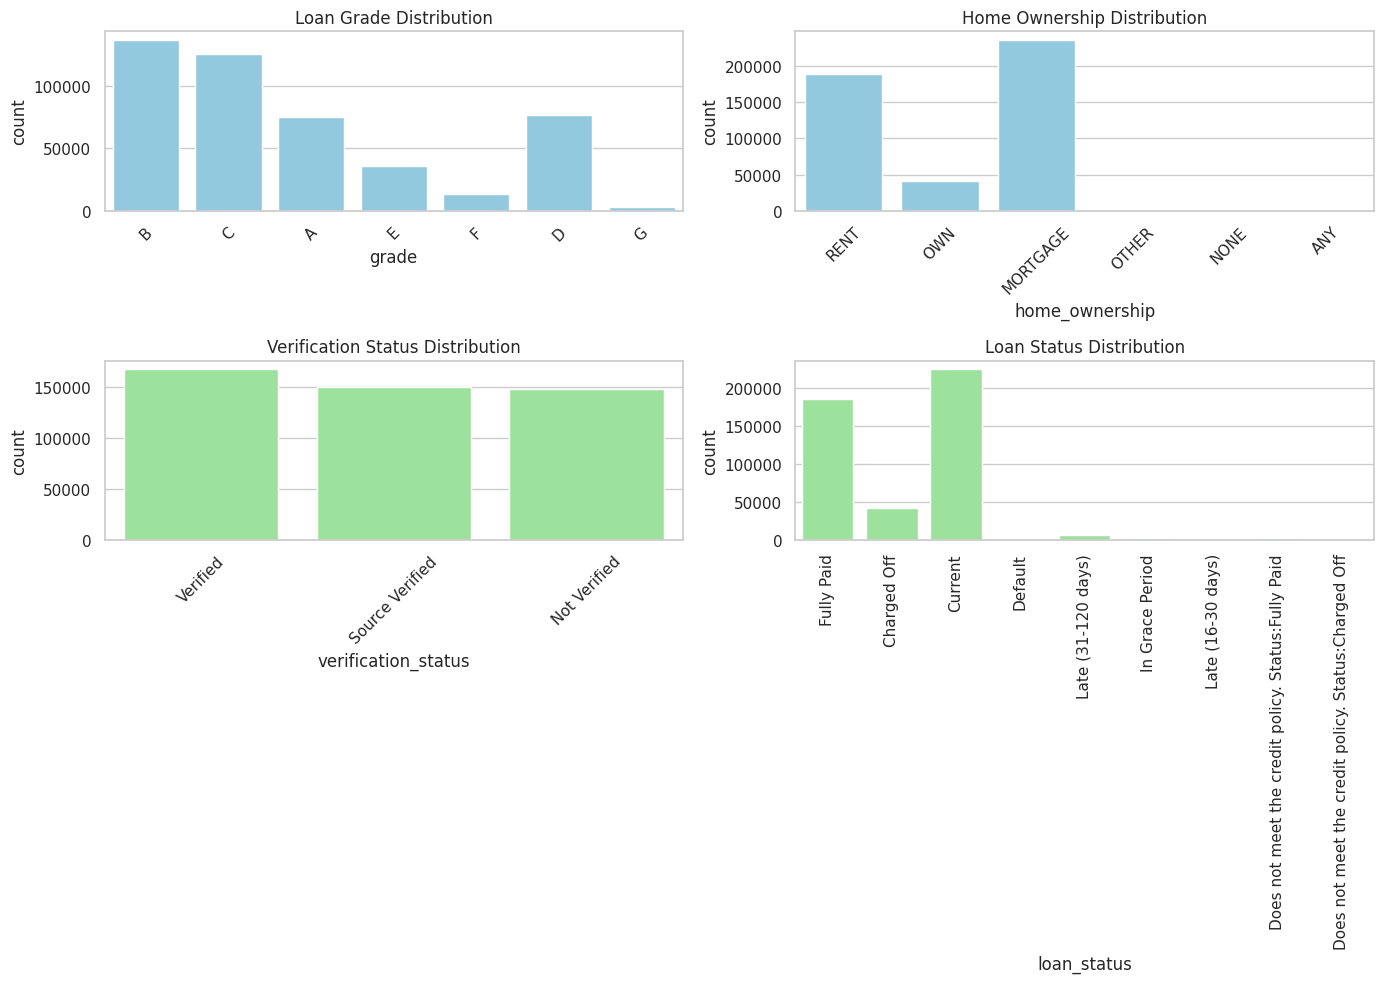

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the default Seaborn style
sns.set_style("whitegrid")

# Create subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for 'grade'
sns.countplot(data=df, x='grade', ax=axes[0, 0], color='skyblue').set(title='Loan Grade Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot for 'home_ownership'
sns.countplot(data=df, x='home_ownership', ax=axes[0, 1], color='skyblue').set(title='Home Ownership Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot for 'verification_status'
sns.countplot(data=df, x='verification_status', ax=axes[1, 0], color='lightgreen').set(title='Verification Status Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for 'loan_status'
sns.countplot(data=df, x='loan_status', ax=axes[1, 1], color='lightgreen').set(title='Loan Status Distribution')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


**Reasons for Column Usage:**

- Variables such as **grade**, **home_ownership**, **verification_status**, and **loan_status** provide insights into borrower risk profiles and characteristics that may influence default likelihood.

**Distribution of Loan Grade, Home Ownership, and Verification Status**

- **Loan Grade**: The distribution graph of loan grades shows that grades **B** and **C** are the most common, which may indicate the moderate risk level accepted by lenders.
- **Home Ownership**: Most borrowers have mortgages or are renting, with few owning their homes. This may influence their risk profile.
- **Verification Status**: Most loans have been verified, indicating efforts to reduce fraud and default risk.

**Loan Status**

- **Loan Status**: Most loans are still in **current** or **fully paid** status, with a smaller number in **default** or **late** status, which is important for portfolio health analysis.


### Cross Tabulation

In [ ]:
# Cross tabulation between 'loan_status' and 'grade'
loan_grade_crosstab = pd.crosstab(df['loan_status'], df['grade'])
print(loan_grade_crosstab)


grade                                                   A      B      C  \
loan_status                                                               
Charged Off                                          2527   9157  11921   
Current                                             35191  64009  63351   
Default                                                30    149    258   
Does not meet the credit policy. Status:Charged...      8     85    148   
Does not meet the credit policy. Status:Fully Paid     90    269    481   
Fully Paid                                          36455  60962  45818   
In Grace Period                                       176    681    900   
Late (16-30 days)                                      58    249    359   
Late (31-120 days)                                    332   1368   2057   

grade                                                   D      E     F     G  
loan_status                                                                   
Charged Off     

**Reasons for Column Usage** :

- Bivariate analysis between loan_status and grade helps identify the relationship between loan condition and the risk assessment provided by the lending institution.

## 3. Analysis of Numeric Variable Correlations

### Heatmap

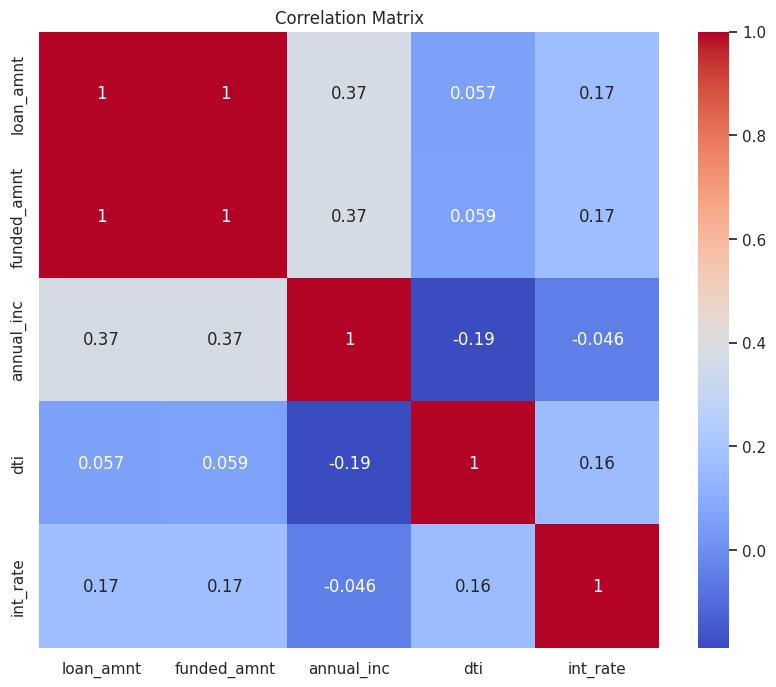

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(dataframe, columns):
    """
    Function to plot the correlation heatmap of specific columns in the dataframe.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing the data.
    columns (list): List of columns to compute the correlation.

    Returns:
    None: The function produces the plot and does not return any value.
    """
    # Compute the correlation matrix
    correlation_matrix = dataframe[columns].corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Call the function
plot_correlation_matrix(df, ['loan_amnt', 'funded_amnt', 'annual_inc', 'dti', 'int_rate'])

**Reasons for Column Usage**:

- This visualization is important for examining the relationships between variables that may have a direct effect on loan capability and borrower risk.

**Correlation Matrix**
- Correlation Between Variables: The correlation matrix reveals the relationships between various numeric variables. There is a moderate positive correlation between loan amount and annual income, indicating that individuals with higher incomes tend to borrow larger amounts. The relationship between interest rate and DTI is also interesting to further explore.

## 4. Time-Related Variable Analysis

### Time Series Plot


0


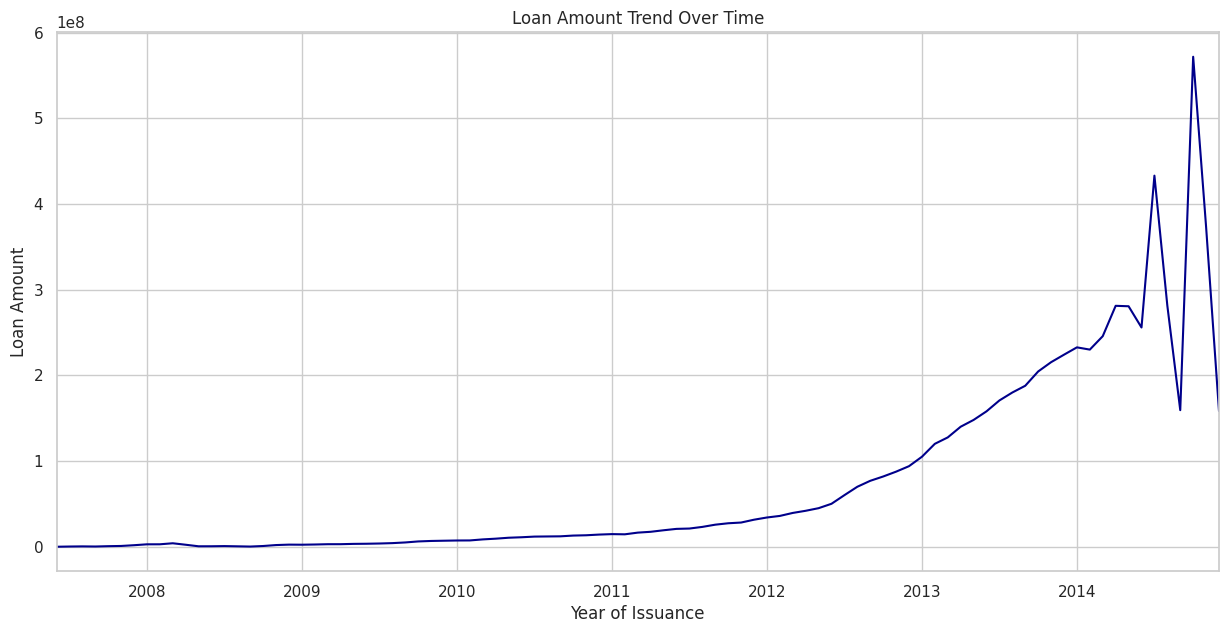

In [ ]:
# Convert 'issue_d' to 'MMM-YY' format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y', errors='coerce')

# Check for conversion errors resulting in NaT (Not a Time)
print(df['issue_d'].isna().sum())

# Continue with analysis if conversion is successful
if df['issue_d'].isna().sum() == 0:
    # Aggregate loan amount by month and year of issuance
    monthly_loan_amount = df.groupby(df['issue_d'].dt.to_period('M'))['loan_amnt'].sum()

    # Visualize the trend of loan amount over time
    plt.figure(figsize=(15, 7))
    monthly_loan_amount.plot(title='Loan Amount Trend Over Time', color='darkblue')
    plt.xlabel('Year of Issuance')
    plt.ylabel('Loan Amount')
    plt.grid(True)
    plt.show()
else:
    print("There is an error in date conversion. Please check the date data format.")

**Reasons for Column Usage:**

- Using **issue_d** and **loan_amnt** allows you to observe how borrowing trends change over time, which can be useful for identifying seasonal or evolving trends due to economic conditions.

**Insight**:

- **Sustained Increase:** There is a consistent increase in the loan amount over the years. This indicates growth in the adoption or utilization of loan services, possibly due to market expansion or the introduction of new appealing products attracting more borrowers.

- **Seasonal Fluctuations:** There are fluctuations that may indicate seasonal trends in borrowing behavior. For instance, increases in loans at certain times of the year could be related to holiday shopping seasons or other economic events.

- **Sharp Spikes and Drops:** Sharp spikes or drops in loan amounts during specific periods could be caused by external factors such as changes in credit policies, economic crises, or interest rate changes. Further analysis of these periods could provide deeper insights into the influence of external factors on borrowing.


## 5. Loan-Related Variable Analysis

### Scatter Plot for loan_amnt vs annual_inc and loan_amnt vs dti

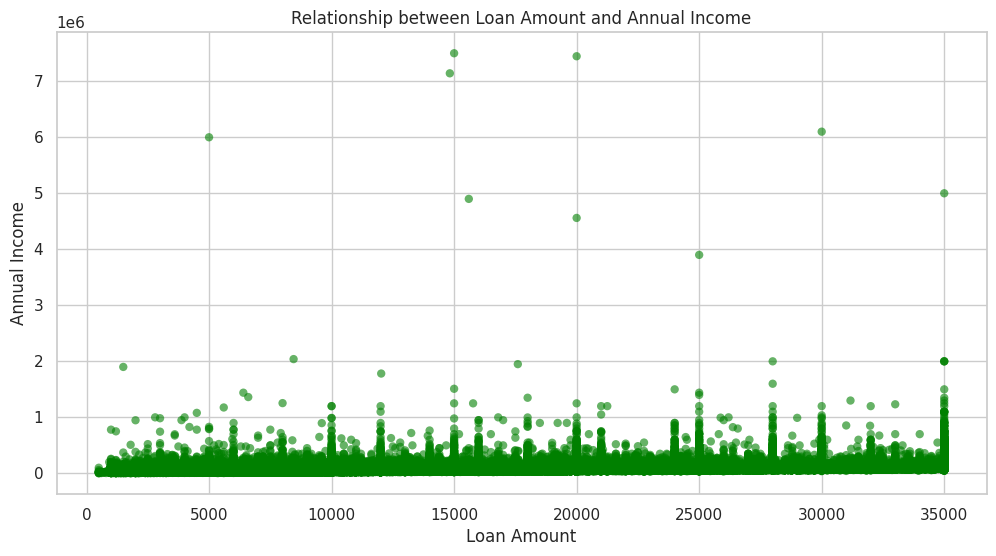

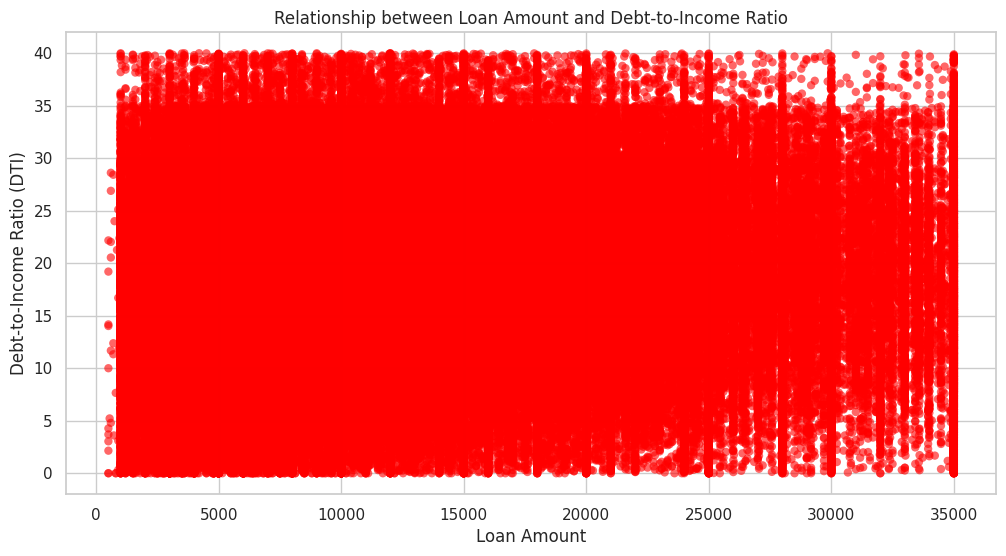

In [ ]:
import seaborn as sns

# Scatter plot between loan amount and annual income
plt.figure(figsize=(12, 6))
sns.scatterplot(x='loan_amnt', y='annual_inc', data=df, alpha=0.6, edgecolor='none', color='green')
plt.title('Relationship between Loan Amount and Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

# Scatter plot between loan amount and debt-to-income ratio
plt.figure(figsize=(12, 6))
sns.scatterplot(x='loan_amnt', y='dti', data=df, alpha=0.6, edgecolor='none', color='red')
plt.title('Relationship between Loan Amount and Debt-to-Income Ratio')
plt.xlabel('Loan Amount')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.grid(True)
plt.show()

**Reasons for Column Usage:**
- This indicates the relationship between the loan amount and annual income, as well as the loan amount and debt-to-income ratio (DTI), which is crucial for credit risk assessment.

**Relationship between Loan Amount and DTI**
- Scatter Plot Loan Amount vs. DTI: The scatter plot shows that there is no clear correlation between the loan amount and DTI, indicating that the loan amount does not directly affect the debt-to-income ratio.


## 6. Missing Values

### Visualization of Missing Data Patterns using missingno

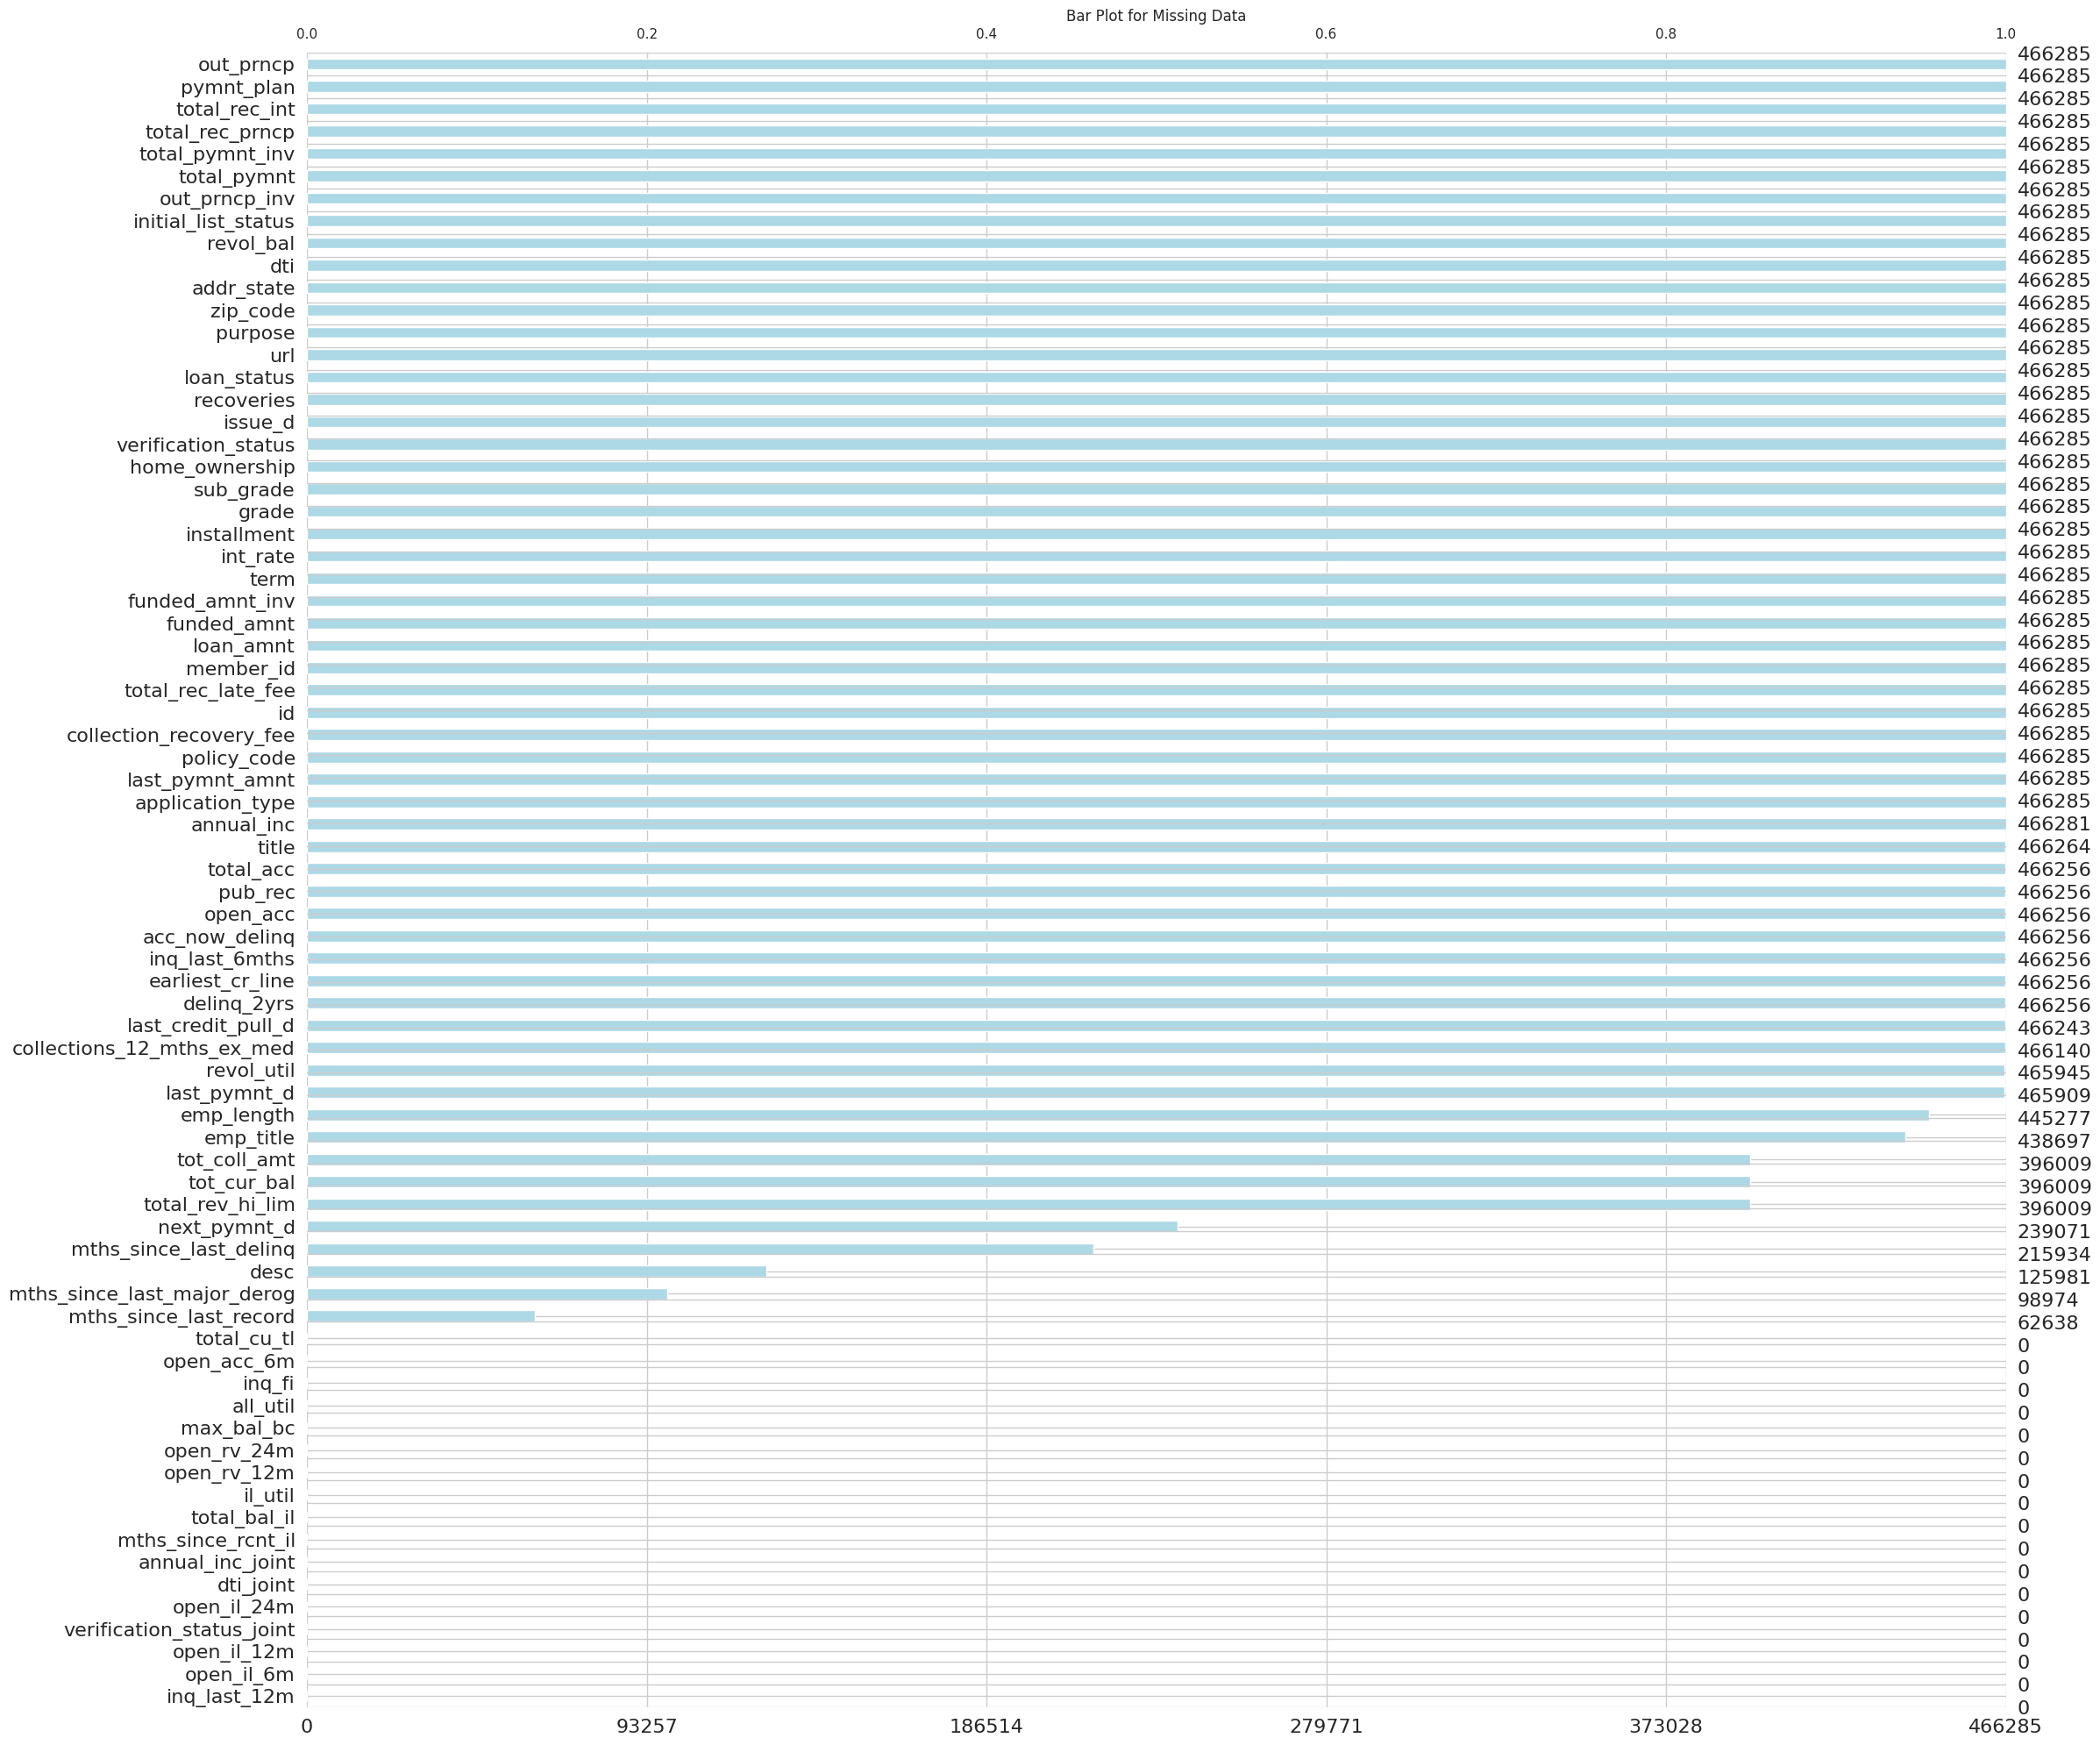

In [ ]:
import missingno as msno

# Visualize the number of missing data per column with a bar plot
msno.bar(df, color='lightblue', sort='ascending')
plt.title('Bar Plot for Missing Data')
plt.show()

**Reasons for Code Usage:**

- This visualization helps identify patterns of missing data, which is crucial for determining imputation or deletion strategies.

- **Columns with Complete Data:**
  Some columns at the bottom of the chart (near the 0.0 scale on the x-axis) have complete data without any missing values. These columns can be relied upon for analysis without the need for imputation or deletion.

- **Columns with Significant Data Loss:**
  On the other hand, some columns, especially those near the 1.0 scale on the x-axis, have a significant amount of missing data, approaching the total number of rows in the dataset. These columns may need to be reconsidered for their usefulness in the model or further analysis due to the amount of missing data.


# Data Preparation

## Initial Cleaning and Imputation

In [ ]:
# Create a copy of the original dataframe
df_original = df.copy()

# Use the copy of the original dataframe for data preparation
df_preparation = df_original.copy()

In [ ]:
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           466285 non-null  int64         
 1   member_id                    466285 non-null  int64         
 2   loan_amnt                    466285 non-null  int64         
 3   funded_amnt                  466285 non-null  int64         
 4   funded_amnt_inv              466285 non-null  float64       
 5   term                         466285 non-null  object        
 6   int_rate                     466285 non-null  float64       
 7   installment                  466285 non-null  float64       
 8   grade                        466285 non-null  object        
 9   sub_grade                    466285 non-null  object        
 10  emp_title                    438697 non-null  object        
 11  emp_length                

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

def prepare_and_clean_data(df):
    # Make a copy of the original dataframe
    df_copy = df.copy()

    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().sum() * 100 / len(df)

    # Filter columns with 100% missing values
    columns_to_drop = missing_percentage[missing_percentage >= 100].index

    # Print columns with 100% missing values that will be dropped
    print("Columns with 100% missing values to be dropped:")
    for col in columns_to_drop:
        print(col)

    # Drop columns with 100% missing values
    df.drop(columns=columns_to_drop, inplace=True)

    # Dropping irrelevant or information-leaking columns
    drop_cols = ['id', 'member_id', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                 'funded_amnt', 'url', 'desc', 'emp_title', 'title', 'zip_code', 'application_type']
    df.drop(drop_cols, axis=1, inplace=True)

    # Convert 'emp_length' to numeric format
    emp_length_map = {
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10
    }
    df['emp_length'] = df['emp_length'].map(emp_length_map)

    # # Remove "xx" from each value in the 'zip_code' column and convert it to numeric format
    # df['zip_code'] = df['zip_code'].str.replace('xx', '').astype(int)

    # Convert 'term' to numeric format
    df['term'] = df['term'].str.replace(' months', '').astype(int)

    # convert_date_columns
    date_columns = ['earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')

    # Impute missing values
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    imputer_num = SimpleImputer(strategy='median')
    df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

    categorical_cols = df.select_dtypes(include=['object']).columns
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

    return df

# Perform data preparation
df_preparation = prepare_and_clean_data(df_preparation)

# Make a copy of the original dataframe for EDA
df_preparation_eda = df_preparation.copy()

Columns with 100% missing values to be dropped:
annual_inc_joint
dti_joint
verification_status_joint
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
inq_fi
total_cu_tl
inq_last_12m


In [ ]:
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  float64       
 1   funded_amnt_inv              466285 non-null  float64       
 2   term                         466285 non-null  float64       
 3   int_rate                     466285 non-null  float64       
 4   installment                  466285 non-null  float64       
 5   grade                        466285 non-null  object        
 6   sub_grade                    466285 non-null  object        
 7   emp_length                   466285 non-null  float64       
 8   home_ownership               466285 non-null  object        
 9   annual_inc                   466285 non-null  float64       
 10  verification_status          466285 non-null  object        
 11  issue_d                   

## Handling Outliers

In [ ]:
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  float64       
 1   funded_amnt_inv              466285 non-null  float64       
 2   term                         466285 non-null  float64       
 3   int_rate                     466285 non-null  float64       
 4   installment                  466285 non-null  float64       
 5   grade                        466285 non-null  object        
 6   sub_grade                    466285 non-null  object        
 7   emp_length                   466285 non-null  float64       
 8   home_ownership               466285 non-null  object        
 9   annual_inc                   466285 non-null  float64       
 10  verification_status          466285 non-null  object        
 11  issue_d                   

In [ ]:
# Calculate variance and skewness
numerical_cols = df_preparation.select_dtypes(include=['int64', 'float64']).columns
stats_df = df_preparation[numerical_cols].agg(['var', 'skew']).transpose()
print(stats_df)

                                      var        skew
loan_amnt                    6.866623e+07    0.730980
funded_amnt_inv              6.885079e+07    0.730250
term                         1.148978e+02    1.006562
int_rate                     1.898856e+01    0.334938
installment                  5.928521e+04    0.949293
emp_length                   1.256274e+01   -0.241954
annual_inc                   3.020969e+09   29.569024
dti                          6.164010e+01    0.188283
delinq_2yrs                  6.357566e-01    5.345914
inq_last_6mths               1.191553e+00    2.142214
mths_since_last_delinq       2.220426e+02    1.003703
mths_since_last_record       1.241326e+02   -1.612660
open_acc                     2.487396e+01    1.165772
pub_rec                      2.609660e-01   14.941738
revol_bal                    4.275071e+08   19.476291
revol_util                   5.628284e+02   -0.161151
total_acc                    1.345552e+02    0.813117
out_prncp                   

In [ ]:
# Calculate descriptive statistics
descriptive_stats = df_preparation[numerical_cols].describe()
print(descriptive_stats)

           loan_amnt  funded_amnt_inv           term       int_rate  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14317.277577     14222.329888      42.605334      13.829236   
std      8286.509164      8297.637788      10.719040       4.357587   
min       500.000000         0.000000      36.000000       5.420000   
25%      8000.000000      8000.000000      36.000000      10.990000   
50%     12000.000000     12000.000000      36.000000      13.660000   
75%     20000.000000     19950.000000      60.000000      16.490000   
max     35000.000000     35000.000000      60.000000      26.060000   

         installment     emp_length    annual_inc            dti  \
count  466285.000000  466285.000000  4.662850e+05  466285.000000   
mean      432.061201       5.993631  7.327729e+04      17.218758   
std       243.485550       3.544396  5.496334e+04       7.851121   
min        15.670000       0.000000  1.896000e+03       0.000000   
25%       256.690000

Based on the statistical analysis of variance and skewness, we have identified several columns that contain significant outliers. Here are the reasons for each selection:

1. **Annual Income (annual_inc)**: This column has a very high standard deviation and a large skewness, indicating significant outliers.
2. **Debt-to-Income Ratio (dti)**: Although the skewness is not very high, the upper bound maximum value suggests the presence of outliers that need attention.
3. **Revolving Balance (revol_bal)**: This column has a large standard deviation and high skewness, indicating significant outliers.
4. **Installment (installment)**: Despite having moderate skewness, the maximum value suggests the presence of outliers.
5. **Recoveries (recoveries) and Collection Recovery Fee (collection_recovery_fee)**: Both columns exhibit very high skewness, indicating significant outliers.
6. **Total Current Balance (tot_cur_bal) and Total Revolving High Credit/Limit (total_rev_hi_lim)**: These columns show very high skewness, indicating significant outliers.
7. **Inquiries in Last 6 Months (inq_last_6mths)**: The relatively high skewness indicates the presence of outliers.
8. **Months Since Last Major Derogatory (mths_since_last_major_derog)**: Although skewness is moderate, the maximum value suggests the presence of outliers.

In [ ]:
# Function to handle outliers using IQR clipping
def dynamic_iqr_clipping(df, columns, factor=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Columns selected for outlier handling
columns_to_adjust = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'revol_bal']

# Apply IQR clipping to handle outliers
df_preparation = dynamic_iqr_clipping(df_preparation, columns_to_adjust, factor=2.0)

# Verify the changes
print(df_preparation.describe())

           loan_amnt  funded_amnt_inv           term       int_rate  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14317.277577     14222.329888      42.605334      13.829236   
min       500.000000         0.000000      36.000000       5.420000   
25%      8000.000000      8000.000000      36.000000      10.990000   
50%     12000.000000     12000.000000      36.000000      13.660000   
75%     20000.000000     19950.000000      60.000000      16.490000   
max     35000.000000     35000.000000      60.000000      26.060000   
std      8286.509164      8297.637788      10.719040       4.357587   

         installment     emp_length     annual_inc  \
count  466285.000000  466285.000000  466285.000000   
mean      431.500140       5.993631   70966.562811   
min        15.670000       0.000000    1896.000000   
25%       256.690000       3.000000   45000.000000   
50%       379.890000       6.000000   63000.000000   
75%       566.580000      10.000000 

In [ ]:
# # Re-visualize distributions after outlier handling
# for col in numerical_cols:
#     plt.figure(figsize=(12, 6))
#     sns.kdeplot(df_preparation[col], color='blue', label='After Outlier Handling')
#     plt.legend()
#     plt.title(f'{col} Distribution After Outlier Handling')
#     plt.show()

In [ ]:
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  float64       
 1   funded_amnt_inv              466285 non-null  float64       
 2   term                         466285 non-null  float64       
 3   int_rate                     466285 non-null  float64       
 4   installment                  466285 non-null  float64       
 5   grade                        466285 non-null  object        
 6   sub_grade                    466285 non-null  object        
 7   emp_length                   466285 non-null  float64       
 8   home_ownership               466285 non-null  object        
 9   annual_inc                   466285 non-null  float64       
 10  verification_status          466285 non-null  object        
 11  issue_d                   

## Categorical Variable Encoding and Target Feature Preparation

In [ ]:
print("\nCategorical Unique Values:")
for column in df_preparation.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")


Categorical Unique Values:
grade: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade: ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status: ['Verified' 'Source Verified' 'Not Verified']
loan_status: ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
pymnt_plan: ['n' 'y']
purpose: ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
addr_state: ['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' '

In [ ]:
# ! pip install category_encoders


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def encode_and_prepare_target(df):
    def label_loan_status(status):
        if status in ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']:
            return 'good_loan'
        return 'bad_loan'

    df['loan_label'] = df['loan_status'].map(label_loan_status)
    df.drop(['loan_status'], axis=1, inplace=True)

    # Encode the target variable
    le = LabelEncoder()
    df['loan_label'] = le.fit_transform(df['loan_label'])  # 0 for 'bad_loan', 1 for 'good_loan'

    # Columns to be encoded using one-hot encoding
    categorical_cols_one_hot = ['home_ownership', 'verification_status', 'initial_list_status', 'pymnt_plan']
    df = pd.get_dummies(df, columns=categorical_cols_one_hot, drop_first=True)

    # Columns to be encoded using label encoding
    categorical_cols_label_encode = ['grade', 'sub_grade', 'purpose', 'addr_state']
    le = LabelEncoder()
    for col in categorical_cols_label_encode:
        df[col] = le.fit_transform(df[col])

    return df

df_preparation = encode_and_prepare_target(df_preparation)


In [ ]:
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            466285 non-null  float64       
 1   funded_amnt_inv                      466285 non-null  float64       
 2   term                                 466285 non-null  float64       
 3   int_rate                             466285 non-null  float64       
 4   installment                          466285 non-null  float64       
 5   grade                                466285 non-null  int64         
 6   sub_grade                            466285 non-null  int64         
 7   emp_length                           466285 non-null  float64       
 8   annual_inc                           466285 non-null  float64       
 9   issue_d                              466285 non-null  datetime64[ns]
 

## Feature Scaling and Transformation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def analyze_and_scale(df):
    # Exclude datetime columns from statistical analysis
    datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Simple statistical analysis
    stats = df[numeric_cols].describe().transpose()
    stats['skew'] = df[numeric_cols].skew()
    stats['kurtosis'] = df[numeric_cols].kurtosis()
    print(stats)

    return df

# Call the analyze_and_scale function
df_preparation = analyze_and_scale(df_preparation)

                                count           mean            std      min  \
loan_amnt                    466285.0   14317.277577    8286.509164   500.00   
funded_amnt_inv              466285.0   14222.329888    8297.637788     0.00   
term                         466285.0      42.605334      10.719040    36.00   
int_rate                     466285.0      13.829236       4.357587     5.42   
installment                  466285.0     431.500140     241.638573    15.67   
grade                        466285.0       1.817095       1.320385     0.00   
sub_grade                    466285.0      11.064971       6.529895     0.00   
emp_length                   466285.0       5.993631       3.544396     0.00   
annual_inc                   466285.0   70966.562811   35814.506104  1896.00   
purpose                      466285.0       2.660617       2.412059     0.00   
addr_state                   466285.0      22.584627      14.781941     0.00   
dti                          466285.0   

StandardScaler
1. **loan_amnt**: Loan amount is a monetary value with potentially large variations. Standard scaling helps in normalizing this feature by removing the mean and scaling to unit variance, making it suitable for models that assume normally distributed features.
2. **installment**: This feature is directly derived from loan amount and interest rate. Standardizing it along with loan amount ensures consistent scaling for related monetary features.
3. **dti (Debt-to-Income Ratio)**: While this is a percentage, standardizing can help in cases where the ratio needs to be compared across different loans and fits the normal distribution assumption for many algorithms.

MinMaxScaler
1. **annual_inc (Annual Income)**: Income values can range widely. Using MinMax scaling brings all income values to a consistent scale between 0 and 1, which is useful for preserving the distribution while keeping the values within a fixed range.
2. **revol_bal (Revolving Balance)**: Similar to income, revolving balance can have a wide range of values. MinMax scaling helps in normalizing this feature without distorting the relative differences between values.
3. **delinq_2yrs (Delinquencies in Last 2 Years)**: This is a count feature and can benefit from MinMax scaling to ensure it is within a standard range, making it easier for models to process.
4. **inq_last_6mths (Inquiries in Last 6 Months)**: Another count feature where MinMax scaling is appropriate to standardize the range.
5. **pub_rec (Public Records)**: Public records count can vary, and scaling it using MinMaxScaler ensures the values are normalized to a standard range.
6. **tot_coll_amt (Total Collection Amount)**: This can have a very wide range, and MinMax scaling helps in bringing this feature to a uniform scale.
7. **tot_cur_bal (Total Current Balance)**: With potentially large variations in balances, MinMax scaling helps in normalizing these values.
8. **total_rev_hi_lim (Total Revolving High Credit/Limit)**: This feature can also have a wide range of values. MinMax scaling ensures all values are within a fixed range, making it easier for models to interpret.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def scale_features(df, standard_scaler_cols, minmax_scaler_cols):
    # Scaling with StandardScaler
    if standard_scaler_cols:
        scaler_standard = StandardScaler()
        df[standard_scaler_cols] = scaler_standard.fit_transform(df[standard_scaler_cols])

    # Scaling with MinMaxScaler
    if minmax_scaler_cols:
        scaler_minmax = MinMaxScaler()
        df[minmax_scaler_cols] = scaler_minmax.fit_transform(df[minmax_scaler_cols])

    return df

# Columns to be scaled with StandardScaler
standard_scaler_cols = ['loan_amnt', 'installment', 'dti']

# Columns to be scaled with MinMaxScaler
minmax_scaler_cols = ['annual_inc', 'revol_bal', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# Apply the scale_features function to the dataframe
df_preparation = scale_features(df_preparation, standard_scaler_cols, minmax_scaler_cols)

# Check the first few rows to ensure the changes
print(df_preparation.head())

   loan_amnt  funded_amnt_inv  term  int_rate  installment  grade  sub_grade  \
0  -1.124392           4975.0  36.0     10.65    -1.111703      1          6   
1  -1.426088           2500.0  60.0     15.27    -1.538126      2         13   
2  -1.438156           2400.0  36.0     15.96    -1.436735      2         14   
3  -0.521001          10000.0  36.0     13.49    -0.381521      2         10   
4  -1.365749           3000.0  60.0     12.69    -1.505184      1          9   

   emp_length  annual_inc    issue_d  ...  loan_label  \
0        10.0    0.126335 2011-12-01  ...           1   
1         0.0    0.160628 2011-12-01  ...           0   
2        10.0    0.059190 2011-12-01  ...           1   
3        10.0    0.270366 2011-12-01  ...           1   
4         1.0    0.446403 2011-12-01  ...           1   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                    False                False                 False   
1                    False    

## Feature Engineering

In [ ]:
def add_new_features(df):
    df['income_to_loan_ratio'] = df['annual_inc'] / df['loan_amnt']
    df['installment_to_income_ratio'] = df['installment'] / df['annual_inc']
    df['revol_util_to_income_ratio'] = df['revol_util'] / df['annual_inc']
    return df

df_preparation = add_new_features(df_preparation)

In [ ]:
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            466285 non-null  float64       
 1   funded_amnt_inv                      466285 non-null  float64       
 2   term                                 466285 non-null  float64       
 3   int_rate                             466285 non-null  float64       
 4   installment                          466285 non-null  float64       
 5   grade                                466285 non-null  int64         
 6   sub_grade                            466285 non-null  int64         
 7   emp_length                           466285 non-null  float64       
 8   annual_inc                           466285 non-null  float64       
 9   issue_d                              466285 non-null  datetime64[ns]
 

## Data Validation

In [ ]:
def validate_data(df):
    # Check for unwanted negative values
    for col in ['annual_inc', 'loan_amnt']:
        if (df[col] < 0).any():
            print(f"Column {col} has negative values")

    # Check for unreasonable values (e.g., 'loan_amnt' greater than 'annual_inc')
    if (df['loan_amnt'] > df['annual_inc']).any():
        print("There are 'loan_amnt' values greater than 'annual_inc'")

    return df

validate_data(df_preparation)

Column loan_amnt has negative values
There are 'loan_amnt' values greater than 'annual_inc'


loan_amnt  funded_amnt_inv  term  int_rate  installment  grade  \
0       -1.124392           4975.0  36.0     10.65    -1.111703      1   
1       -1.426088           2500.0  60.0     15.27    -1.538126      2   
2       -1.438156           2400.0  36.0     15.96    -1.436735      2   
3       -0.521001          10000.0  36.0     13.49    -0.381521      2   
4       -1.365749           3000.0  60.0     12.69    -1.505184      1   
...           ...              ...   ...       ...          ...    ...   
466280   0.492696          18400.0  60.0     14.47     0.004717      2   
466281   0.927137          22000.0  60.0     19.97     0.624900      3   
466282   0.770256          20700.0  60.0     16.99     0.342826      3   
466283  -1.486427           2000.0  36.0      7.90    -1.526704      0   
466284  -0.521001           9975.0  36.0     19.20    -0.264528      3   

        sub_grade  emp_length  annual_inc    issue_d  ...  \
0               6        10.0    0.126335 2011-12-01  ...   
1              13         0.0    0.160628 2011-12-01  ...   
2              14        10.0    0.059190 2011-12-01  ...   
3              10        10.0    0.270366 2011-12-01  ...   
4               9         1.0    0.446403 2011-12-01  ...   
...           ...         ...         ...        ...  ...   
466280         11         4.0    0.617868 2014-01-01  ...   
466281         19        10.0    0.434972 2014-01-01  ...   
466282         15         7.0    0.252076 2014-01-01  ...   
466283          3         3.0    0.463549 2014-01-01  ...   
466284         17        10.0    0.252076 2014-01-01  ...   

        home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                      False               False                 True   
1                      False               False                 True   
2                      False               False                 True   
3                      False               False                 True   
4                      False               False                 True   
...                      ...                 ...                  ...   
466280                 False               False                False   
466281                 False               False                False   
466282                 False               False                False   
466283                 False                True                False   
466284                 False               False                False   

        verification_status_Source Verified verification_status_Verified  \
0                                     False                         True   
1                                      True                        False   
2                                     False                        False   
3                                      True                        False   
4                                      True                        False   
...                                     ...                          ...   
466280                                 True                        False   
466281                                False                         True   
466282                                False                         True   
466283                                False                         True   
466284                                False                         True   

        initial_list_status_w  pymnt_plan_y  income_to_loan_ratio  \
0                       False         False             -0.112359   
1                       False         False             -0.112636   
2                       False         False             -0.041157   
3                       False         False             -0.518935   
4                       False         False             -0.326856   
...                       ...           ...                   ...   
466280                   True         False              1.254056   
466281                  False         False 

In [ ]:
import pandas as pd

def fix_data(df):
    # Handle negative values
    for col in ['annual_inc', 'loan_amnt']:
        df.loc[df[col] < 0, col] = None

    # Handle 'loan_amnt' greater than 'annual_inc'
    df.loc[df['loan_amnt'] > df['annual_inc'], 'loan_amnt'] = None

    return df

df_preparation = fix_data(df_preparation)

In [ ]:
# Re-run the validate_data function to check for issues
validate_data(df_preparation)

loan_amnt  funded_amnt_inv  term  int_rate  installment  grade  \
0             NaN           4975.0  36.0     10.65    -1.111703      1   
1             NaN           2500.0  60.0     15.27    -1.538126      2   
2             NaN           2400.0  36.0     15.96    -1.436735      2   
3             NaN          10000.0  36.0     13.49    -0.381521      2   
4             NaN           3000.0  60.0     12.69    -1.505184      1   
...           ...              ...   ...       ...          ...    ...   
466280   0.492696          18400.0  60.0     14.47     0.004717      2   
466281        NaN          22000.0  60.0     19.97     0.624900      3   
466282        NaN          20700.0  60.0     16.99     0.342826      3   
466283        NaN           2000.0  36.0      7.90    -1.526704      0   
466284        NaN           9975.0  36.0     19.20    -0.264528      3   

        sub_grade  emp_length  annual_inc    issue_d  ...  \
0               6        10.0    0.126335 2011-12-01  ...   
1              13         0.0    0.160628 2011-12-01  ...   
2              14        10.0    0.059190 2011-12-01  ...   
3              10        10.0    0.270366 2011-12-01  ...   
4               9         1.0    0.446403 2011-12-01  ...   
...           ...         ...         ...        ...  ...   
466280         11         4.0    0.617868 2014-01-01  ...   
466281         19        10.0    0.434972 2014-01-01  ...   
466282         15         7.0    0.252076 2014-01-01  ...   
466283          3         3.0    0.463549 2014-01-01  ...   
466284         17        10.0    0.252076 2014-01-01  ...   

        home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                      False               False                 True   
1                      False               False                 True   
2                      False               False                 True   
3                      False               False                 True   
4                      False               False                 True   
...                      ...                 ...                  ...   
466280                 False               False                False   
466281                 False               False                False   
466282                 False               False                False   
466283                 False                True                False   
466284                 False               False                False   

        verification_status_Source Verified verification_status_Verified  \
0                                     False                         True   
1                                      True                        False   
2                                     False                        False   
3                                      True                        False   
4                                      True                        False   
...                                     ...                          ...   
466280                                 True                        False   
466281                                False                         True   
466282                                False                         True   
466283                                False                         True   
466284                                False                         True   

        initial_list_status_w  pymnt_plan_y  income_to_loan_ratio  \
0                       False         False             -0.112359   
1                       False         False             -0.112636   
2                       False         False             -0.041157   
3                       False         False             -0.518935   
4                       False         False             -0.326856   
...                       ...           ...                   ...   
466280                   True         False              1.254056   
466281                  False         False 

# Deep Exploratory Data Analysis (EDA)

In [ ]:
df_preparation_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  float64       
 1   funded_amnt_inv              466285 non-null  float64       
 2   term                         466285 non-null  float64       
 3   int_rate                     466285 non-null  float64       
 4   installment                  466285 non-null  float64       
 5   grade                        466285 non-null  object        
 6   sub_grade                    466285 non-null  object        
 7   emp_length                   466285 non-null  float64       
 8   home_ownership               466285 non-null  object        
 9   annual_inc                   466285 non-null  float64       
 10  verification_status          466285 non-null  object        
 11  issue_d                   

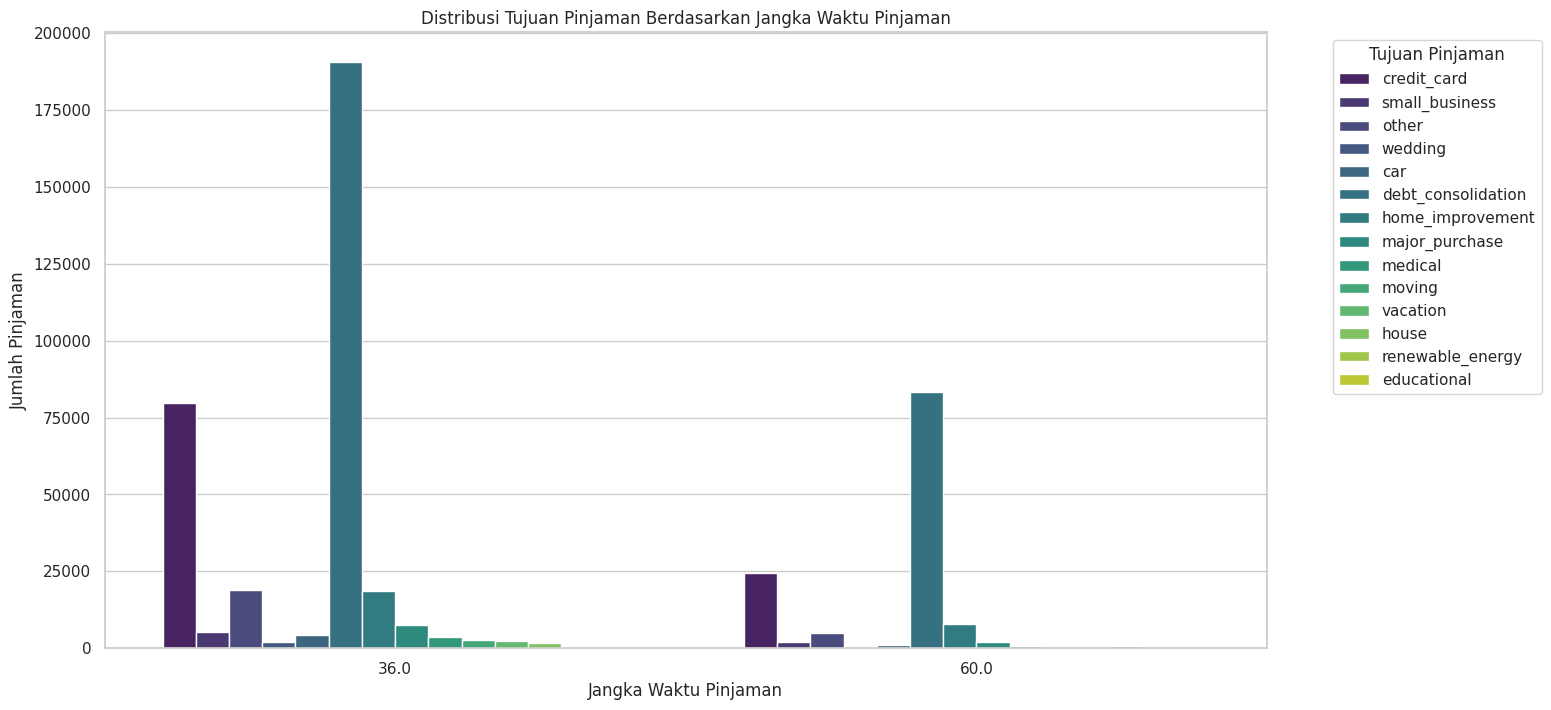

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='term', hue='purpose', data=df_preparation_eda, palette='viridis')
plt.title('Distribusi Tujuan Pinjaman Berdasarkan Jangka Waktu Pinjaman')
plt.xlabel('Jangka Waktu Pinjaman')
plt.ylabel('Jumlah Pinjaman')
plt.legend(title='Tujuan Pinjaman', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Fungsi untuk mengonversi loan_status menjadi label biner
def label_loan_status_eda(status):
    if status in ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']:
        return 'good_loan'
    return 'bad_loan'

# Menambahkan kolom loan_label
df_preparation_eda['loan_label'] = df_preparation_eda['loan_status'].map(label_loan_status_eda)

# Menghapus kolom loan_status (opsional)
df_preparation_eda.drop(['loan_status'], axis=1, inplace=True)

## Correlation Analysis: What are the strong correlations between different features in the dataset?

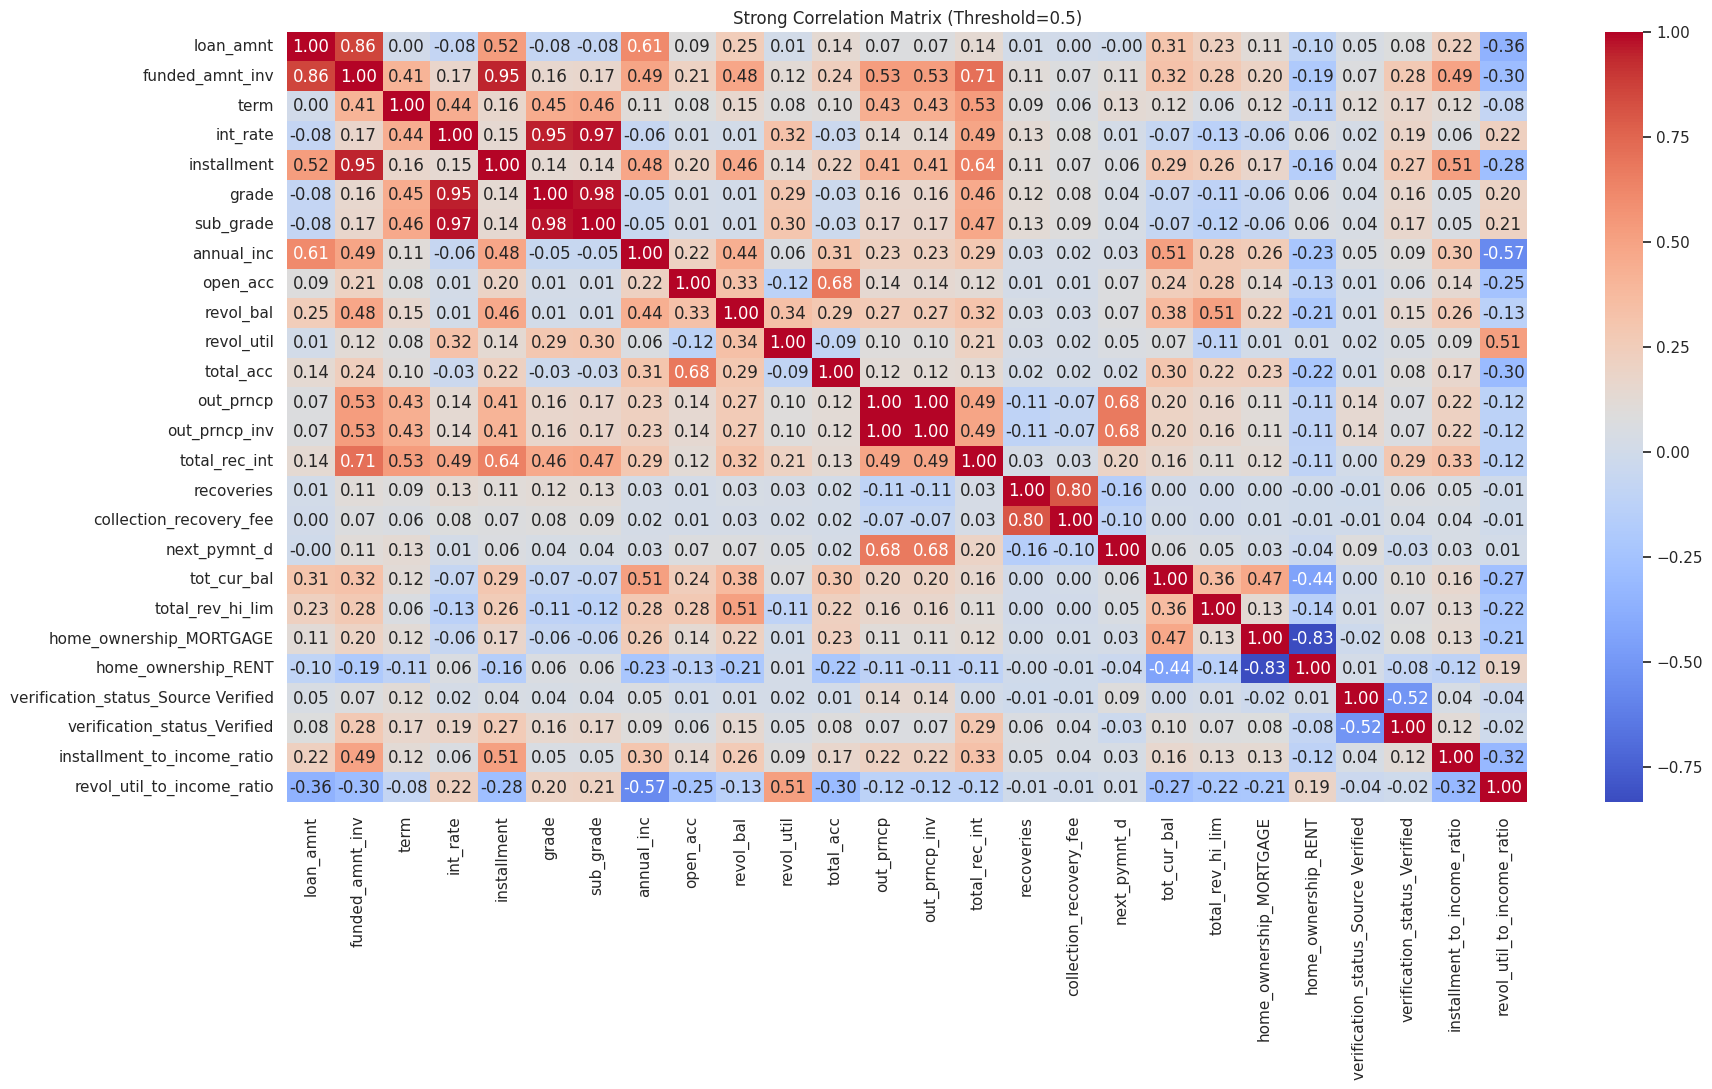

Strongly correlated columns:
loan_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade
annual_inc, open_acc, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv
total_rec_int, recoveries, collection_recovery_fee, next_pymnt_d, tot_cur_bal, total_rev_hi_lim, home_ownership_MORTGAGE
home_ownership_RENT, verification_status_Source Verified, verification_status_Verified, installment_to_income_ratio, revol_util_to_income_ratio


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_correlation_matrix(dataframe, threshold=0.5):
    # Find correlations between columns
    correlation_matrix = dataframe.corr().abs()

    # Generate a boolean matrix indicating strong correlations
    strong_correlation = (correlation_matrix > threshold) & (correlation_matrix < 1)

    # Select columns with strong correlations
    strong_correlation_columns = [column for column in strong_correlation.columns if any(strong_correlation[column])]

    # Check for columns with low data variance
    low_variance_columns = [col for col in dataframe.columns if dataframe[col].nunique() < 2]

    # Remove columns with low data variance
    strong_correlation_columns = [col for col in strong_correlation_columns if col not in low_variance_columns]

    # Create a matrix of strong correlations
    strong_correlation_matrix = dataframe[strong_correlation_columns].corr()

    # Create correlation heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(strong_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Strong Correlation Matrix (Threshold={threshold})')
    plt.show()

    # Print columns with strong correlations
    print("Strongly correlated columns:")
    num_columns = len(strong_correlation_columns)
    num_columns_per_row = 7
    for i in range(0, num_columns, num_columns_per_row):
        print(', '.join(strong_correlation_columns[i:i+num_columns_per_row]))

# Set the desired threshold (0.5 in this example)
plot_correlation_matrix(df_preparation, threshold=0.5)


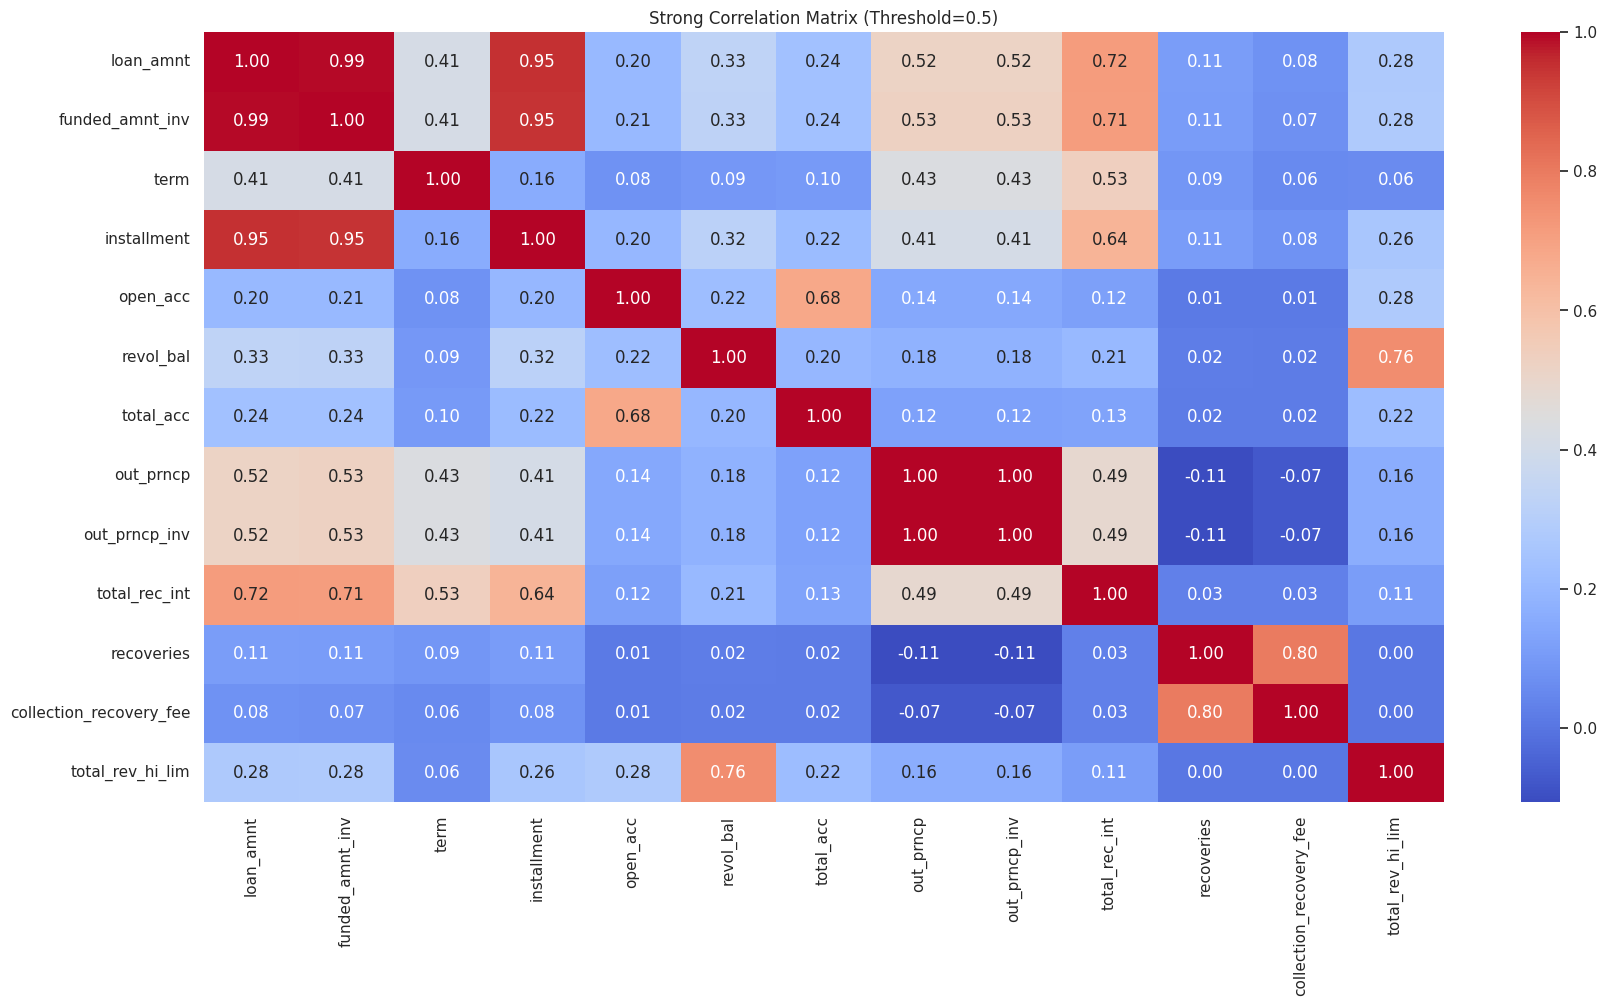

Strongly correlated columns:
loan_amnt, funded_amnt_inv, term, installment, open_acc, revol_bal, total_acc
out_prncp, out_prncp_inv, total_rec_int, recoveries, collection_recovery_fee, total_rev_hi_lim


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(dataframe, threshold=0.5):
    # Select only numeric columns
    numeric_df = dataframe.select_dtypes(include=[np.number])

    # Find correlations between columns
    correlation_matrix = numeric_df.corr().abs()

    # Generate a boolean matrix indicating strong correlations
    strong_correlation = (correlation_matrix > threshold) & (correlation_matrix < 1)

    # Select columns with strong correlations
    strong_correlation_columns = [column for column in strong_correlation.columns if any(strong_correlation[column])]

    # Check for columns with low data variance
    low_variance_columns = [col for col in numeric_df.columns if numeric_df[col].nunique() < 2]

    # Remove columns with low data variance
    strong_correlation_columns = [col for col in strong_correlation_columns if col not in low_variance_columns]

    # Create a matrix of strong correlations
    strong_correlation_matrix = numeric_df[strong_correlation_columns].corr()

    # Create correlation heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(strong_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Strong Correlation Matrix (Threshold={threshold})')
    plt.show()

    # Print columns with strong correlations
    print("Strongly correlated columns:")
    num_columns = len(strong_correlation_columns)
    num_columns_per_row = 7
    for i in range(0, num_columns, num_columns_per_row):
        print(', '.join(strong_correlation_columns[i:i+num_columns_per_row]))

# Set the desired threshold (0.5 in this example)
plot_correlation_matrix(df_preparation_eda, threshold=0.5)


## What Are the Monthly and Yearly Trends in Loan Issuance?


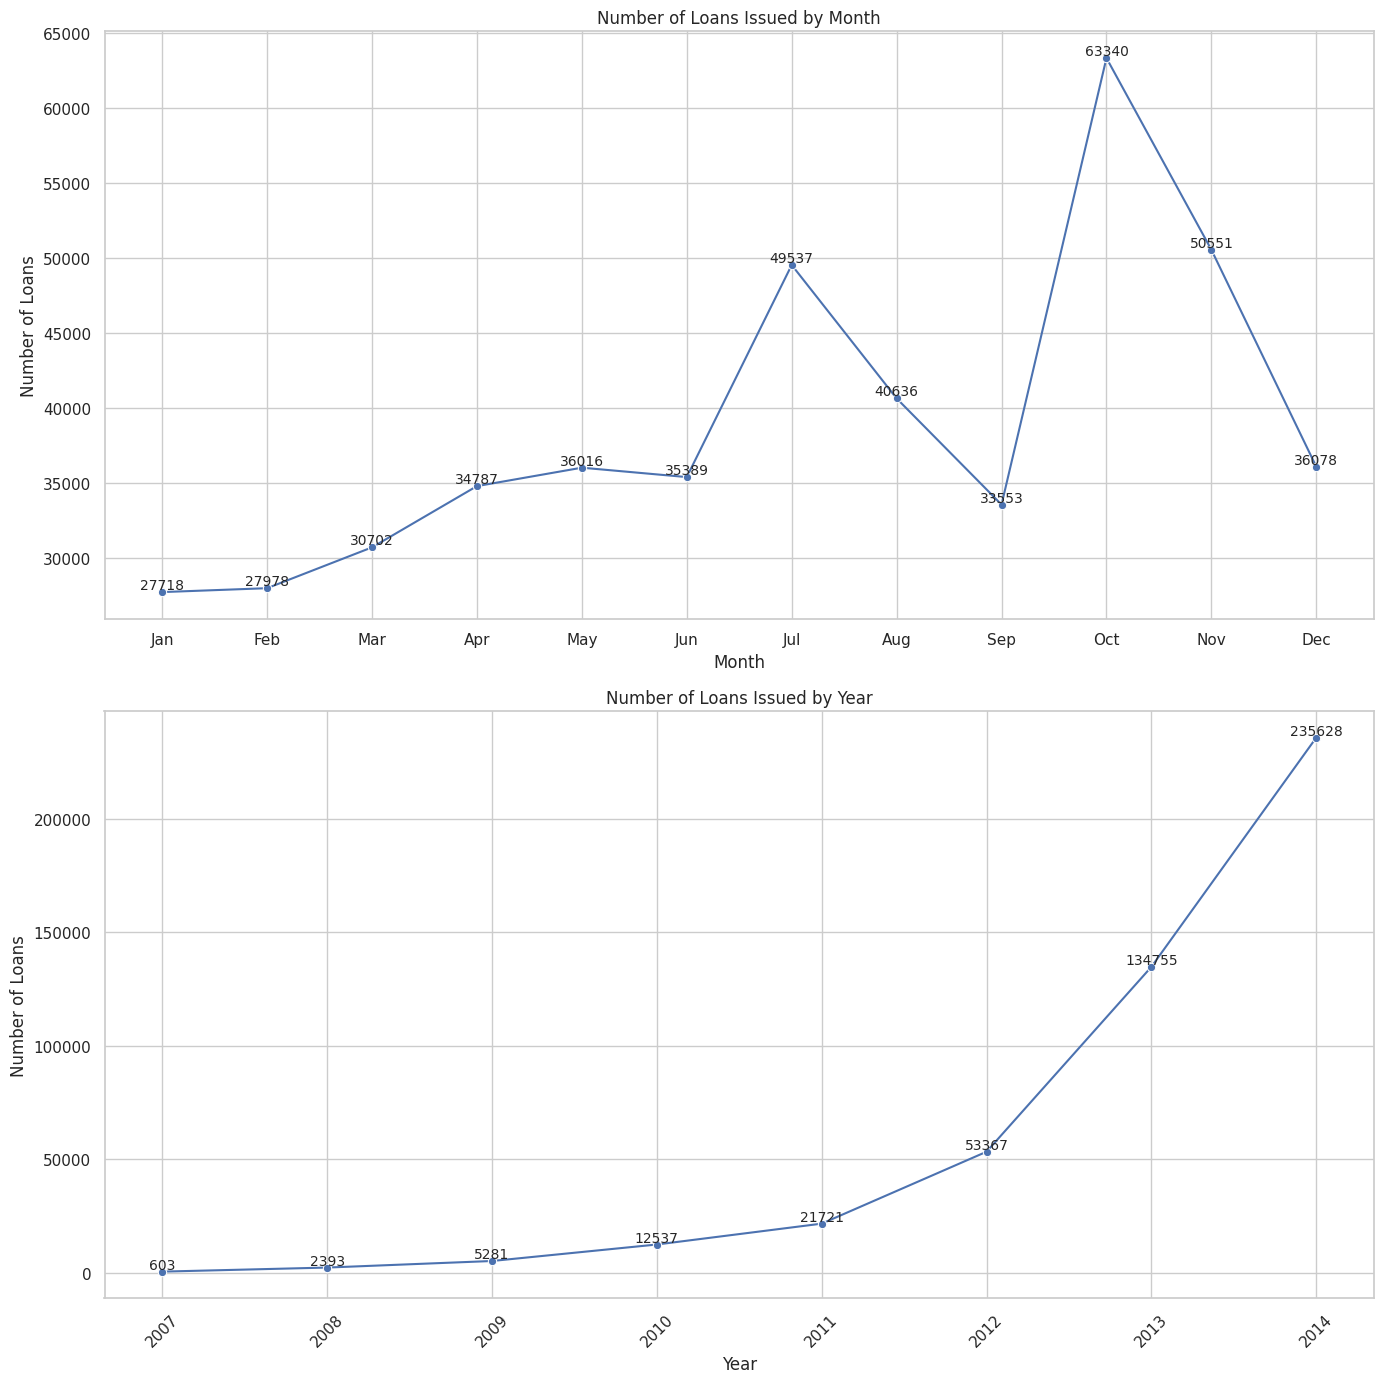

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'issue_d' column to datetime if not already converted
df_preparation_eda['issue_d'] = pd.to_datetime(df_preparation_eda['issue_d'], errors='coerce')

# Create a column 'issue_month' containing only month information
df_preparation_eda['issue_month'] = df_preparation_eda['issue_d'].dt.month

# Group data by 'issue_month' and count the number of loans issued
monthly_loan_counts = df_preparation_eda.groupby('issue_month').size()

# Create a column 'issue_year' containing year information
df_preparation_eda['issue_year'] = df_preparation_eda['issue_d'].dt.year

# Group data by 'issue_year' and count the number of loans issued
yearly_loan_counts = df_preparation_eda.groupby('issue_year').size()

# Create subplot
fig, axes = plt.subplots(2, 1, figsize=(14, 14))

# Plot the number of loans issued by month
sns.lineplot(x=monthly_loan_counts.index, y=monthly_loan_counts.values, marker='o', ax=axes[0])
axes[0].set_title('Number of Loans Issued by Month')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Loans', fontsize=12)
axes[0].set_xticks(range(1, 13))  # Set ticks for each month
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].grid(True)

# Add annotations for each data point in the monthly plot
for x, y in zip(monthly_loan_counts.index, monthly_loan_counts.values):
    axes[0].text(x, y, f'{y}', ha='center', va='bottom', fontsize=10)

# Plot the number of loans issued by year
sns.lineplot(x=yearly_loan_counts.index, y=yearly_loan_counts.values, marker='o', color='b', ax=axes[1])
axes[1].set_title('Number of Loans Issued by Year')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Number of Loans', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Add annotations for each data point in the yearly plot
for x, y in zip(yearly_loan_counts.index, yearly_loan_counts.values):
    axes[1].text(x, y, f'{y}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## Is there a difference in the average loan amount between good loans and bad loans based on loan purposes?

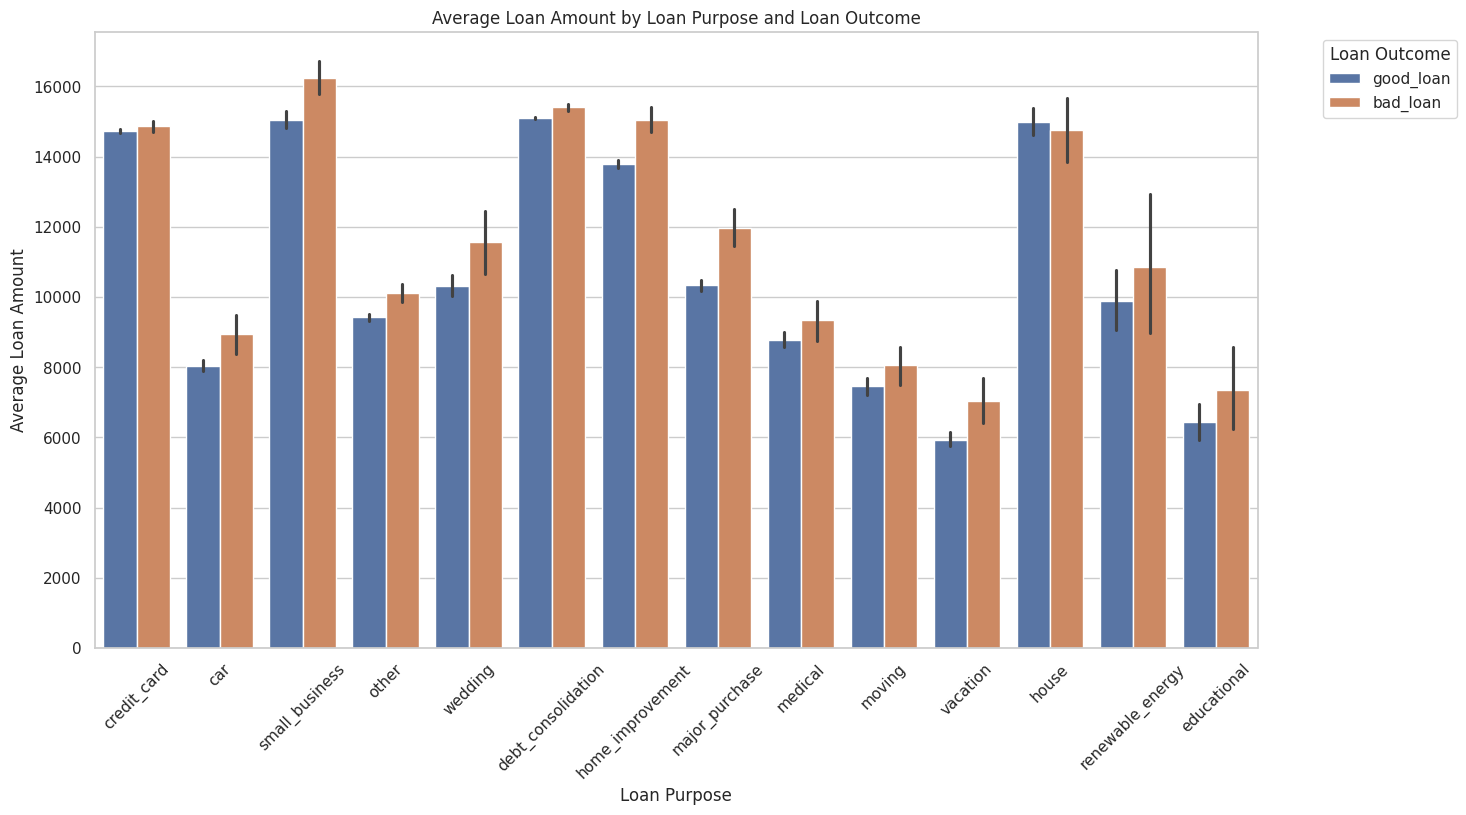

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_label', data=df_preparation_eda)
plt.title('Average Loan Amount by Loan Purpose and Loan Outcome')
plt.xlabel('Loan Purpose')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.legend(title='Loan Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Is there a significant difference in the number of loans issued based on the region (addr_state) and loan label (loan_label)?


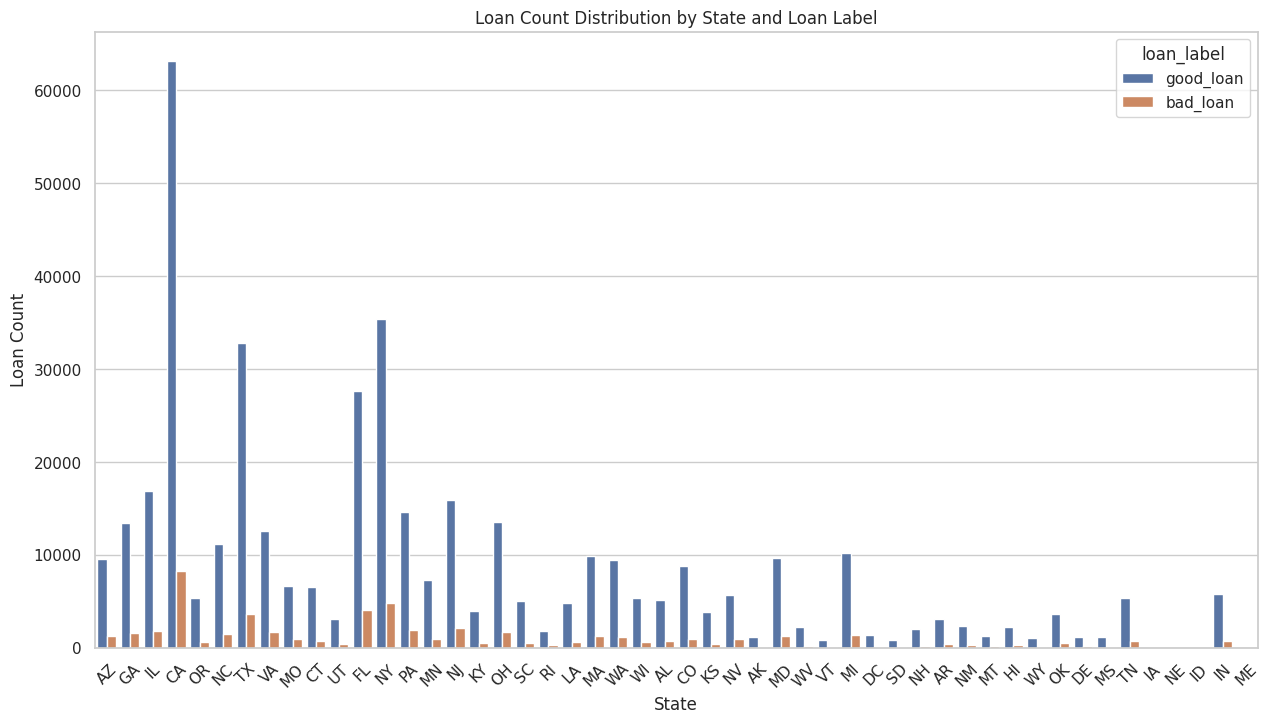

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='addr_state', hue='loan_label', data=df_preparation_eda)
plt.title('Loan Count Distribution by State and Loan Label')
plt.xlabel('State')
plt.ylabel('Loan Count')
plt.xticks(rotation=45)
plt.show()

##  What is the most common purpose for loan applications?

<ipython-input-57-3bbb1589a35a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='purpose', data=df_preparation_eda, order=df_preparation_eda['purpose'].value_counts().index, palette='viridis')


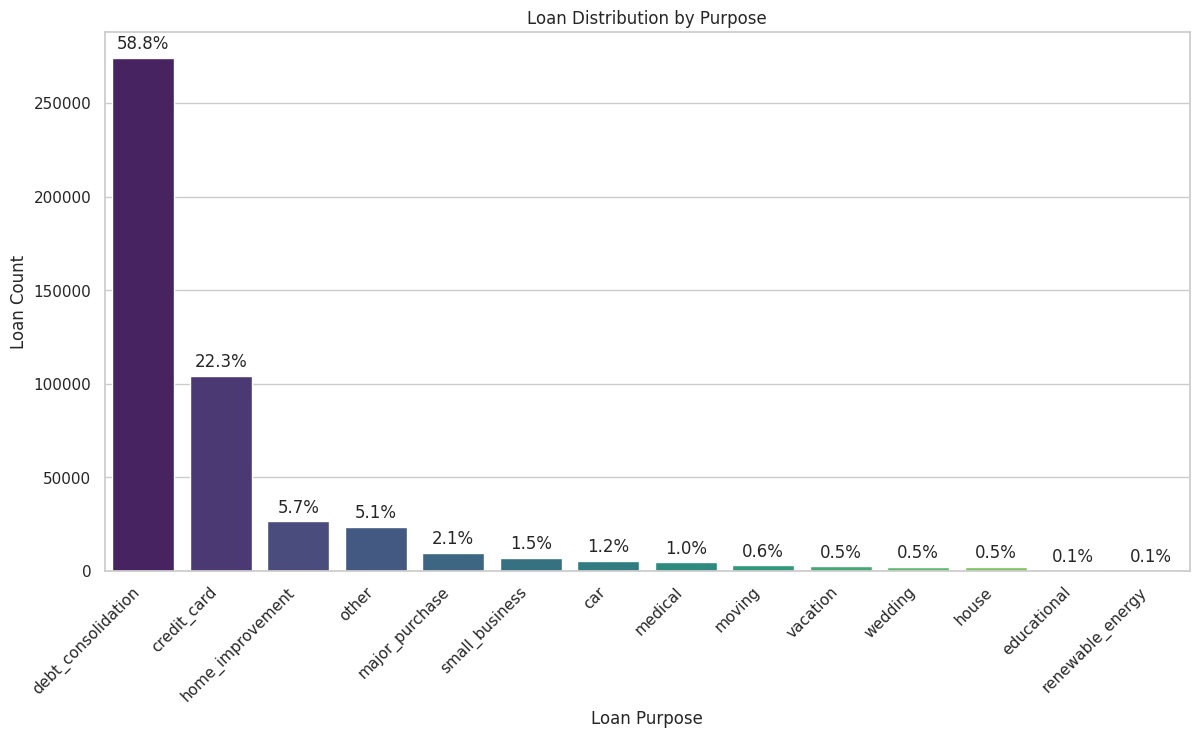

In [ ]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(x='purpose', data=df_preparation_eda, order=df_preparation_eda['purpose'].value_counts().index, palette='viridis')
plt.title('Loan Distribution by Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Count')
plt.xticks(rotation=45, ha='right')

# Adding percentages on top of bars
total = len(df_preparation_eda)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Does home ownership status affect the approved loan amount?

<ipython-input-58-1365ca633865>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_loan_amnt_by_home_ownership.index, y=avg_loan_amnt_by_home_ownership.values, palette='Blues_d')


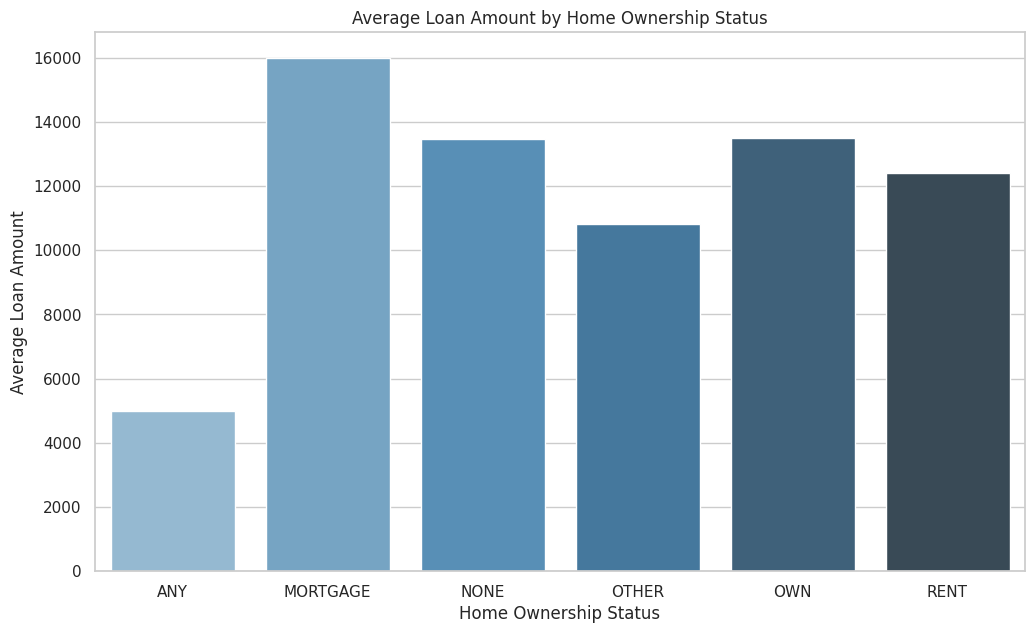

In [ ]:
avg_loan_amnt_by_home_ownership = df_preparation_eda.groupby('home_ownership')['loan_amnt'].mean()

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_loan_amnt_by_home_ownership.index, y=avg_loan_amnt_by_home_ownership.values, palette='Blues_d')
plt.title('Average Loan Amount by Home Ownership Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=0)
plt.show()

## What is the interest rate distribution by loan grade?

<ipython-input-59-7cd210799ba2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='int_rate', data=df_preparation_eda, palette='plasma', order=grade_order)


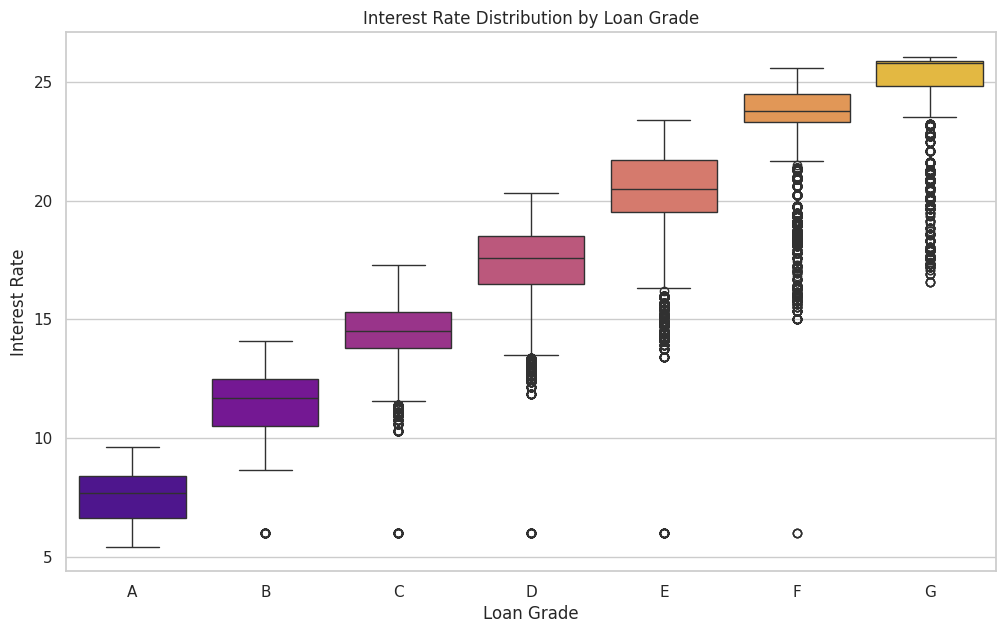

In [ ]:
# Grade order from A to G
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.figure(figsize=(12, 7))
sns.boxplot(x='grade', y='int_rate', data=df_preparation_eda, palette='plasma', order=grade_order)
plt.title('Interest Rate Distribution by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

## Does employment length (emp_length) affect the approved loan amount?

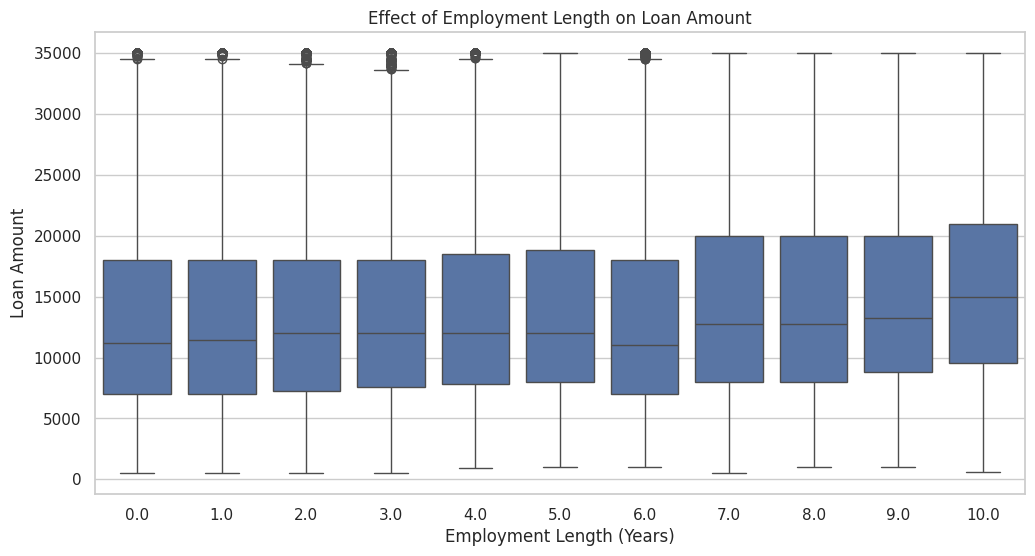

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='emp_length', y='loan_amnt', data=df_preparation_eda)
plt.title('Effect of Employment Length on Loan Amount')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Loan Amount')
plt.show()

## How is the loan amount distributed by loan grade and home ownership status?

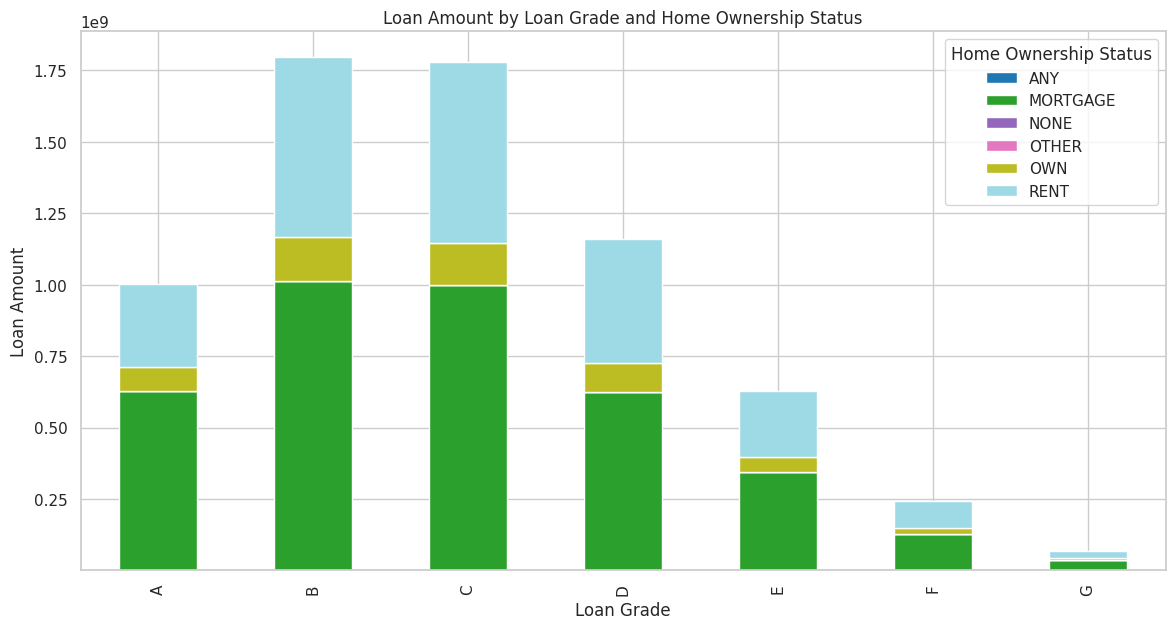

In [ ]:
# Creating pivot table
pivot_table = df_preparation_eda.pivot_table(values='loan_amnt', index='grade', columns='home_ownership', aggfunc='sum', fill_value=0)

# Creating plot with more contrasting colors
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Loan Amount by Loan Grade and Home Ownership Status')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Amount')
plt.legend(title='Home Ownership Status')
plt.show()

# Data Splitting

In [ ]:
# Drop datetime columns
datetime_cols = df_preparation.select_dtypes(include=['datetime64[ns]']).columns
df_preparation = df_preparation.drop(columns=datetime_cols)

# Ensure datetime columns are dropped
print("Columns after dropping datetime:")
print(df_preparation.dtypes)

Columns after dropping datetime:
loan_amnt                              float64
funded_amnt_inv                        float64
term                                   float64
int_rate                               float64
installment                            float64
grade                                    int64
sub_grade                                int64
emp_length                             float64
annual_inc                             float64
purpose                                  int64
addr_state                               int64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
mths_since_last_record                 float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                  

## Splitting Data with Stratified Shuffle Split

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

def split_data(df, target_col, test_size=0.2, random_state=42):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df_preparation, 'loan_label')

In [ ]:
df_preparation['loan_label'].value_counts()

loan_label
1    414099
0     52186
Name: count, dtype: int64

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (373028, 47)
Shape of X_test: (93257, 47)
Shape of y_train: (373028,)
Shape of y_test: (93257,)


## Checking Infinity Value and Very Large Value

In [ ]:
import numpy as np

# Check for infinity values
print("Checking for infinity values in X_train:")
print(np.isinf(X_train).sum())

print("Checking for infinity values in X_test:")
print(np.isinf(X_test).sum())

# Check for very large values
print("Checking for very large values in X_train:")
print((X_train > np.finfo(np.float64).max).sum())

print("Checking for very large values in X_test:")
print((X_test > np.finfo(np.float64).max).sum())

Checking for infinity values in X_train:
loan_amnt                              0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_length                             0
annual_inc                             0
purpose                                0
addr_state                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
out_prncp                              0
out_prncp_inv                          0
total_rec_int   

## Replacement of Infinity and NaN Values ​​with Column Median

In [ ]:
# Function to replace infinity and NaN values with column median
def replace_inf_and_nan_with_median(df):
    for col in df.columns:
        if np.isinf(df[col]).sum() > 0:
            median_value = df[col].replace([np.inf, -np.inf], np.nan).median()
            df[col] = df[col].replace([np.inf, -np.inf], median_value)
        if df[col].isna().sum() > 0:
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)
    return df

# Replace infinity and NaN values in X_train and X_test
X_train = replace_inf_and_nan_with_median(X_train)
X_test = replace_inf_and_nan_with_median(X_test)

# Recheck for infinity and NaN values after replacement
print("Rechecking for infinity values in X_train after replacement:")
print(np.isinf(X_train).sum())

print("Rechecking for infinity values in X_test after replacement:")
print(np.isinf(X_test).sum())

print("Rechecking for NaN values in X_train after replacement:")
print(X_train.isna().sum().sum())

print("Rechecking for NaN values in X_test after replacement:")
print(X_test.isna().sum().sum())

Rechecking for infinity values in X_train after replacement:
loan_amnt                              0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_length                             0
annual_inc                             0
purpose                                0
addr_state                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
out_prncp                              0
out_prncp_inv                        

# Data Modelling

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

## train and evaluate model

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"Performance Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    if y_pred_prob is not None:
        print(f"ROC AUC Score for {model_name}: {roc_auc_score(y_test, y_pred_prob)}")

    visualize_classification_report(model, X_test, y_test, model_name)
    plot_confusion_matrix(y_test, y_pred, model_name)
    if y_pred_prob is not None:
        plot_roc_curve(y_test, y_pred_prob, model_name)
        plot_precision_recall_curve(y_test, y_pred_prob, model_name)

## Resampling Techniques

### Manual Resampling

In [ ]:
def manual_resample(X_train, y_train, random_state=42):
    X_train_combined = pd.concat([X_train, y_train], axis=1)
    majority_class = X_train_combined[X_train_combined['loan_label'] == 1]
    minority_class = X_train_combined[X_train_combined['loan_label'] == 0]
    minority_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=random_state)
    X_train_resampled = pd.concat([majority_class, minority_oversampled])
    y_train_resampled = X_train_resampled['loan_label']
    X_train_resampled = X_train_resampled.drop(columns=['loan_label'])
    return X_train_resampled, y_train_resampled


### SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
def smote_resample(X_train, y_train, random_state=42):
    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    return X_train_resampled, y_train_resampled

In [ ]:
# X_train_resampled, y_train_resampled = smote_resample(X_train, y_train)
# rf_model_resampled = RandomForestClassifier(random_state=42)
# train_and_evaluate_model(rf_model_resampled, X_train_resampled, y_train_resampled, X_test, y_test, "Random Forest (SMOTE)")

# Evaluation

## Classification Report Visualization

In [ ]:
def visualize_classification_report(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"Classification Report - {model_name}")
    plt.show()

## Confusion Matrix Visualization

In [ ]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt=".0f")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## ROC Curve Visualization

In [ ]:
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

## Precision-Recall Curve Visualization

In [ ]:
def plot_precision_recall_curve(y_test, y_pred_prob, model_name):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve - {model_name}')
    plt.legend(loc="lower left")
    plt.show()

## No Sampling

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.55      0.69     10437
           1       0.95      0.99      0.97     82820

    accuracy                           0.94     93257
   macro avg       0.92      0.77      0.83     93257
weighted avg       0.94      0.94      0.94     93257

ROC AUC Score for Logistic Regression: 0.9114791872172305


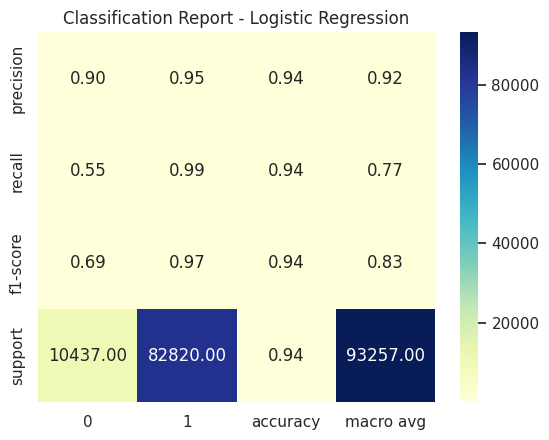

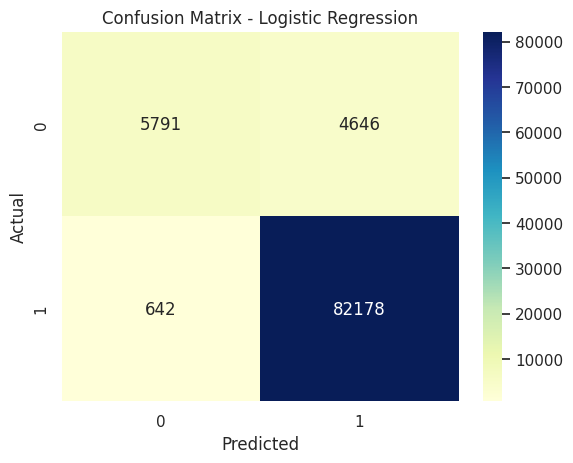

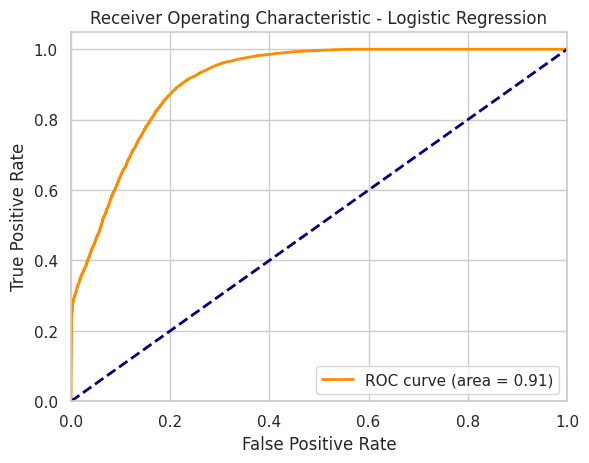

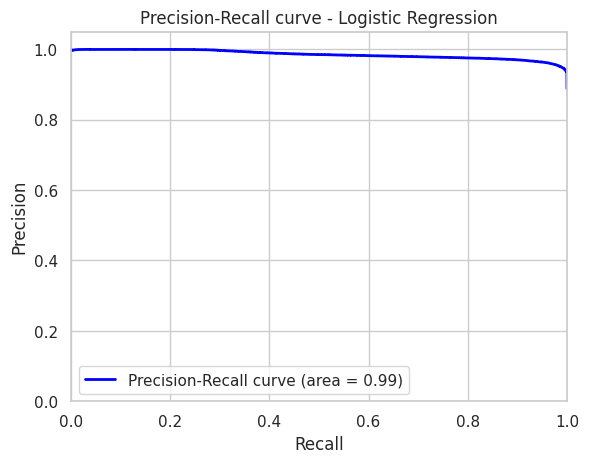

Performance Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77     10437
           1       0.97      0.97      0.97     82820

    accuracy                           0.95     93257
   macro avg       0.86      0.88      0.87     93257
weighted avg       0.95      0.95      0.95     93257

ROC AUC Score for Decision Tree: 0.878559272054632


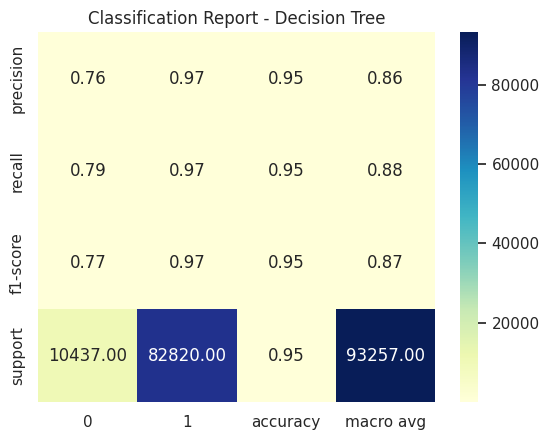

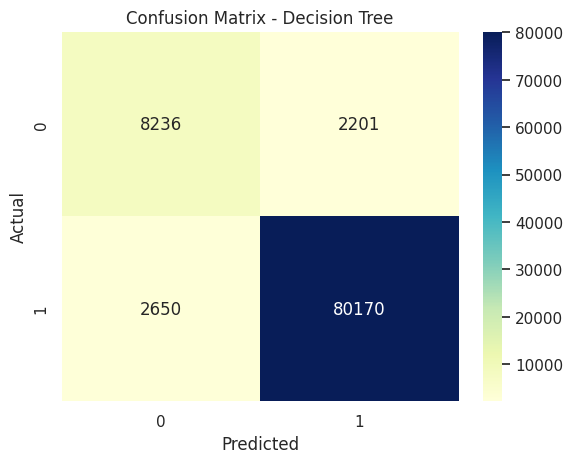

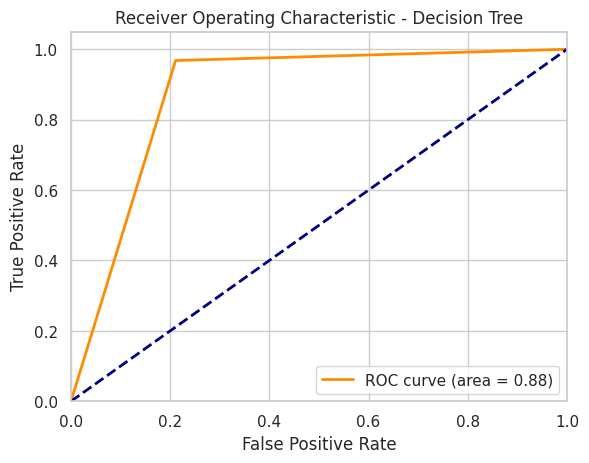

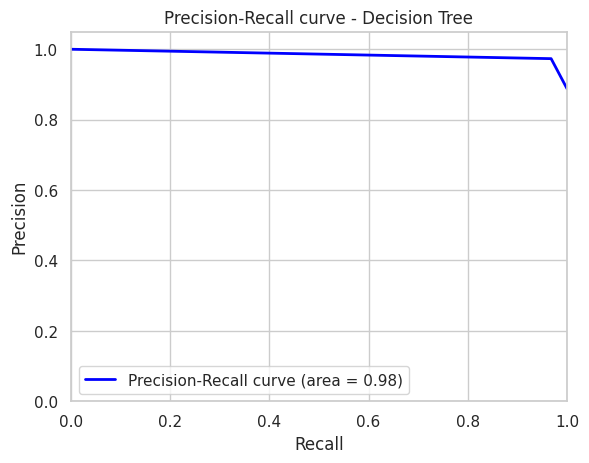

Performance Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     10437
           1       0.97      1.00      0.98     82820

    accuracy                           0.97     93257
   macro avg       0.96      0.86      0.90     93257
weighted avg       0.97      0.97      0.96     93257

ROC AUC Score for Random Forest: 0.9562062986351776


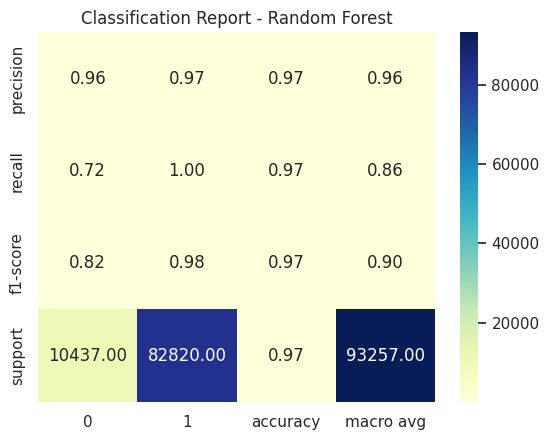

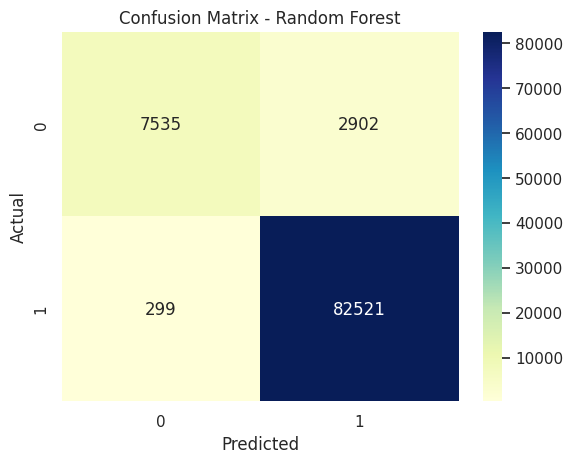

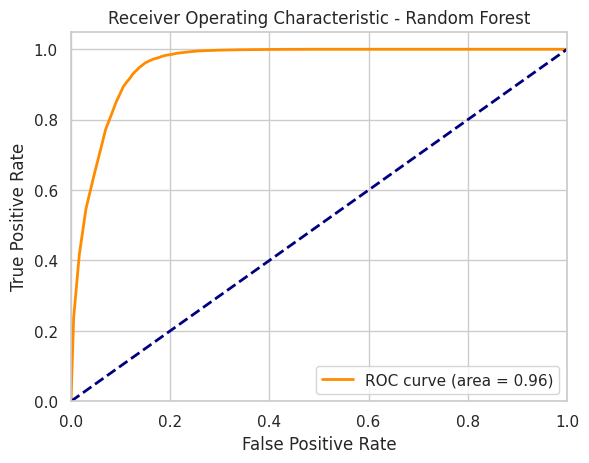

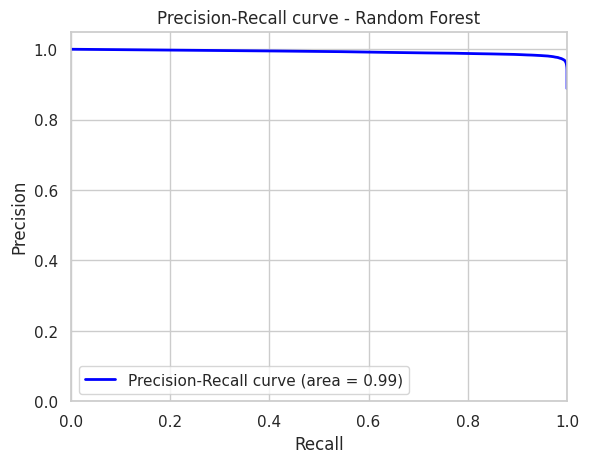

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test, "Logistic Regression")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")


## Manual Resampling

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance Report for Logistic Regression (Manual Resampling):
              precision    recall  f1-score   support

           0       0.50      0.80      0.62     10437
           1       0.97      0.90      0.93     82820

    accuracy                           0.89     93257
   macro avg       0.74      0.85      0.78     93257
weighted avg       0.92      0.89      0.90     93257

ROC AUC Score for Logistic Regression (Manual Resampling): 0.925587251270644


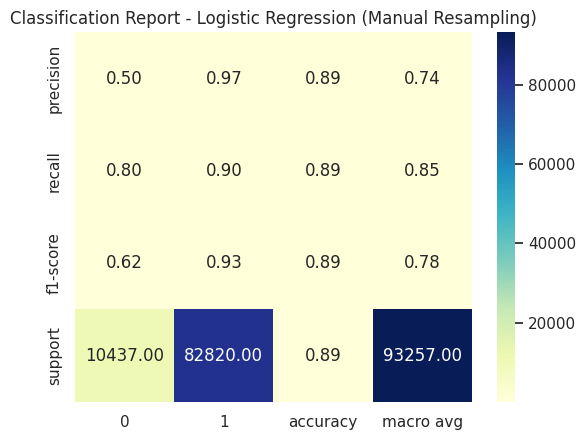

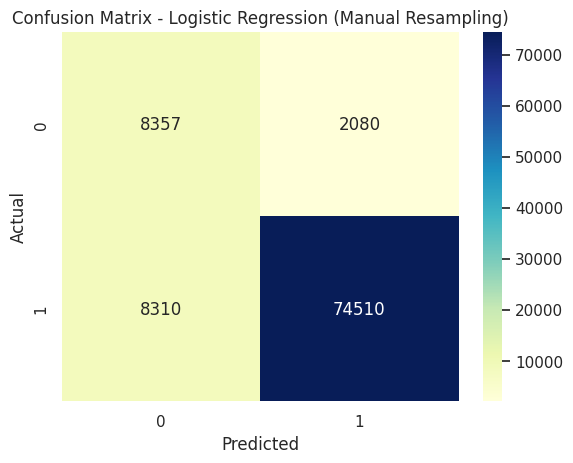

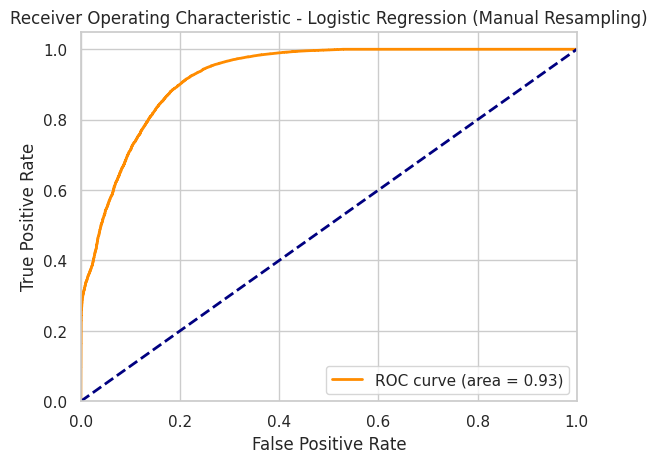

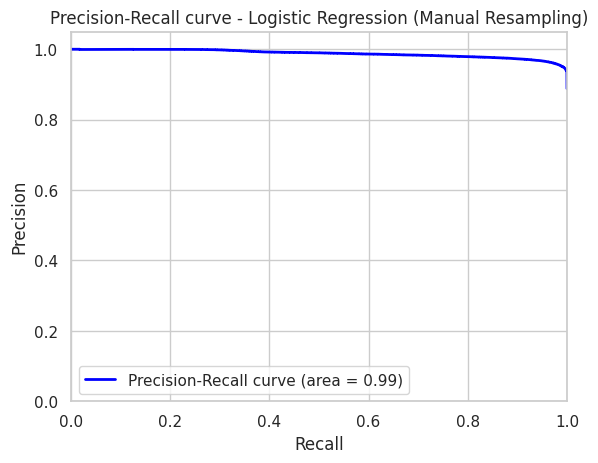

Performance Report for Decision Tree (Manual Resampling):
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     10437
           1       0.97      0.97      0.97     82820

    accuracy                           0.95     93257
   macro avg       0.87      0.87      0.87     93257
weighted avg       0.95      0.95      0.95     93257

ROC AUC Score for Decision Tree (Manual Resampling): 0.873203349418853


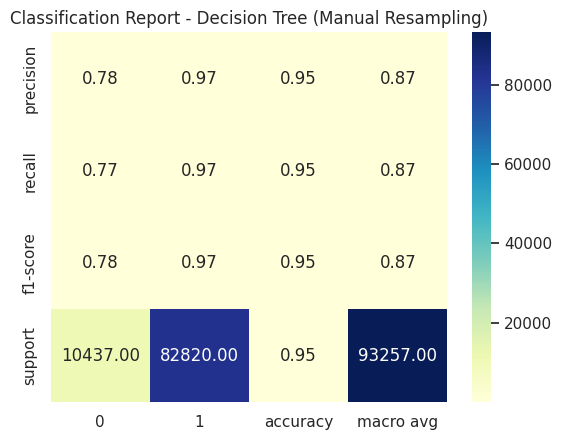

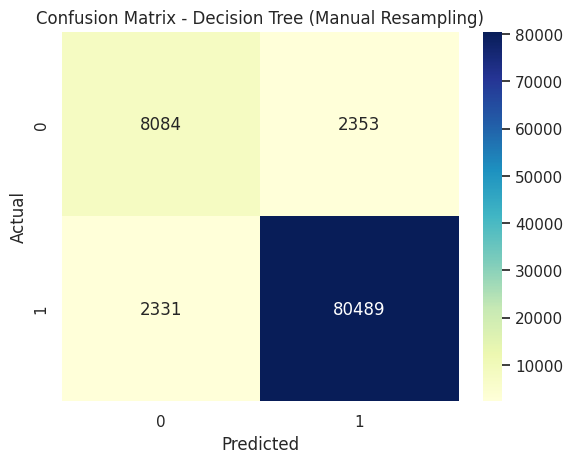

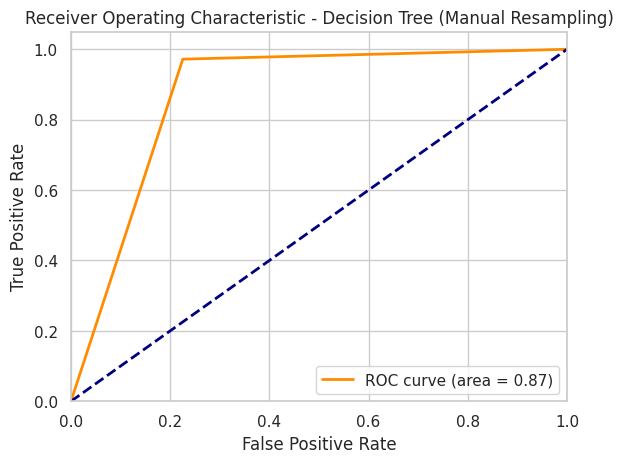

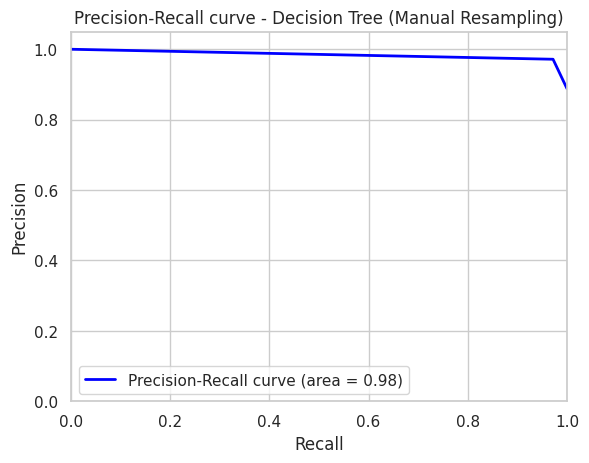

Performance Report for Random Forest (Manual Resampling):
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     10437
           1       0.97      0.99      0.98     82820

    accuracy                           0.97     93257
   macro avg       0.96      0.87      0.91     93257
weighted avg       0.97      0.97      0.97     93257

ROC AUC Score for Random Forest (Manual Resampling): 0.9588687904152413


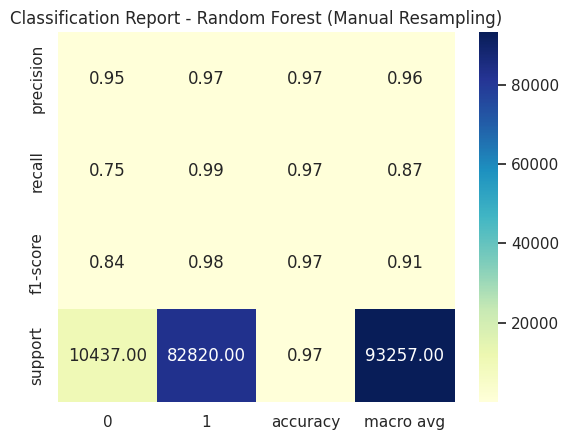

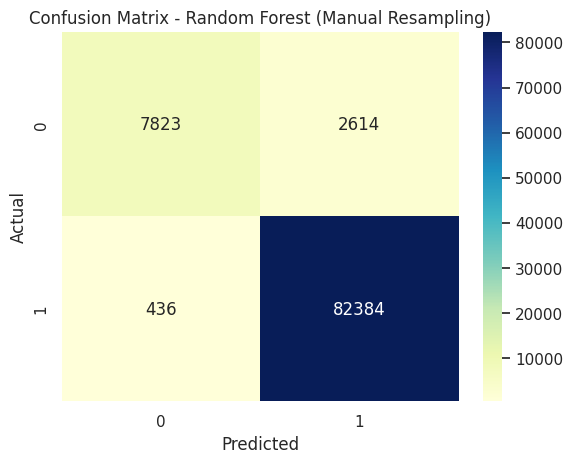

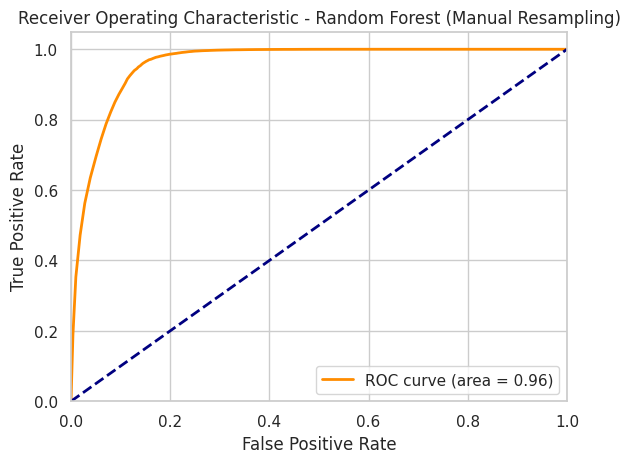

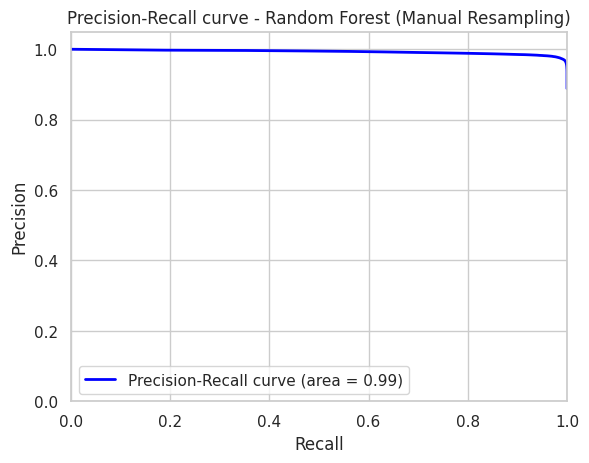

In [ ]:
# Manual Resampling
X_train_manual_resampled, y_train_manual_resampled = manual_resample(X_train, y_train)
train_and_evaluate_model(lr_model, X_train_manual_resampled, y_train_manual_resampled, X_test, y_test, "Logistic Regression (Manual Resampling)")
train_and_evaluate_model(dt_model, X_train_manual_resampled, y_train_manual_resampled, X_test, y_test, "Decision Tree (Manual Resampling)")
train_and_evaluate_model(rf_model, X_train_manual_resampled, y_train_manual_resampled, X_test, y_test, "Random Forest (Manual Resampling)")


## SMOTE

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance Report for Logistic Regression (SMOTE):
              precision    recall  f1-score   support

           0       0.48      0.79      0.60     10437
           1       0.97      0.89      0.93     82820

    accuracy                           0.88     93257
   macro avg       0.73      0.84      0.77     93257
weighted avg       0.92      0.88      0.89     93257

ROC AUC Score for Logistic Regression (SMOTE): 0.9184193626704281


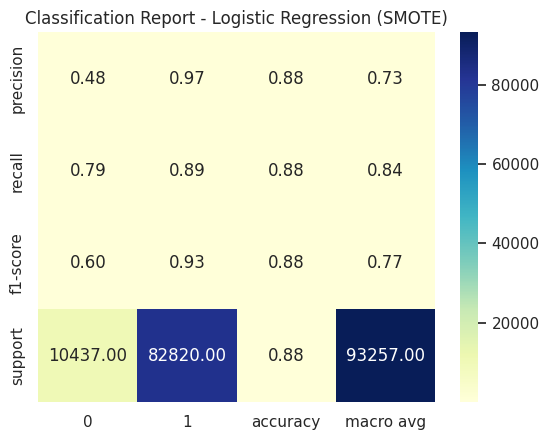

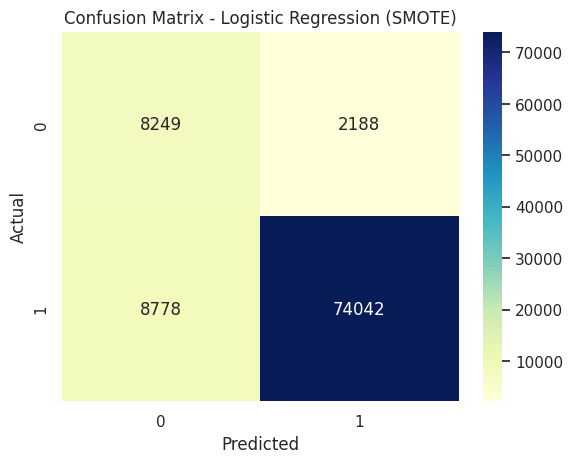

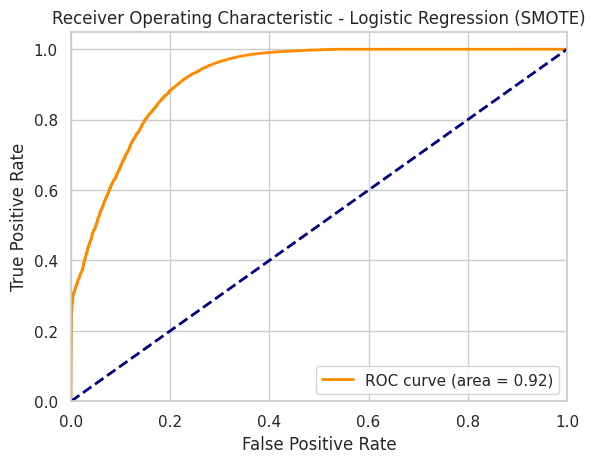

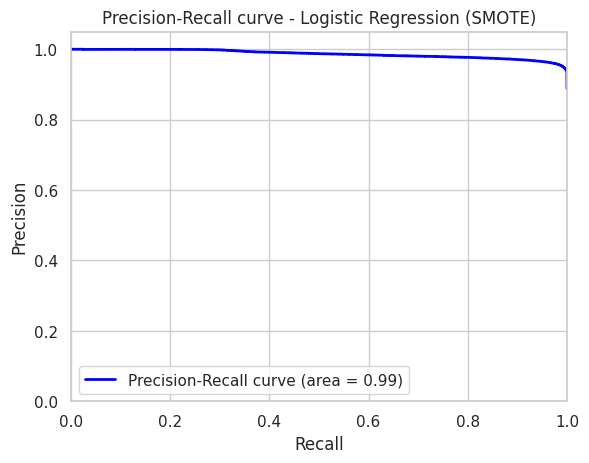

Performance Report for Decision Tree (SMOTE):
              precision    recall  f1-score   support

           0       0.36      0.77      0.49     10437
           1       0.97      0.82      0.89     82820

    accuracy                           0.82     93257
   macro avg       0.66      0.80      0.69     93257
weighted avg       0.90      0.82      0.84     93257

ROC AUC Score for Decision Tree (SMOTE): 0.796962692311688


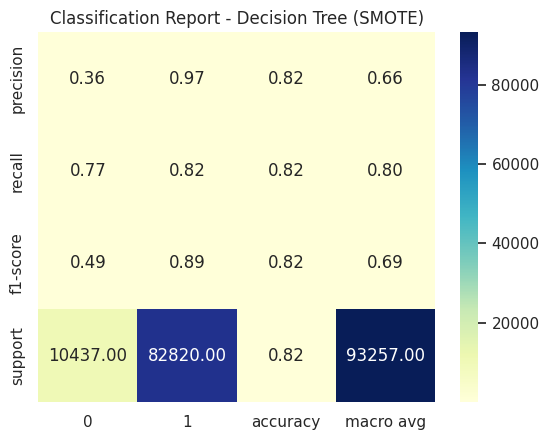

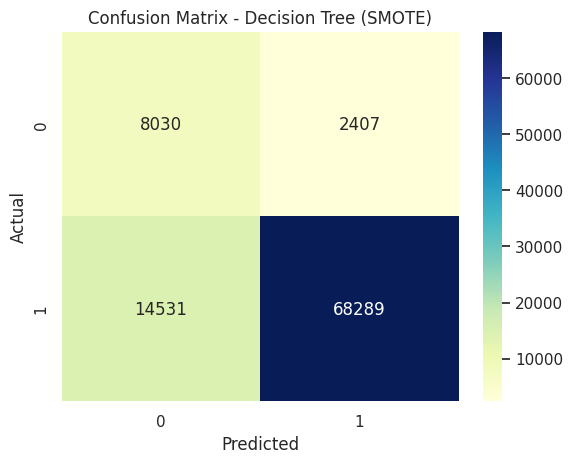

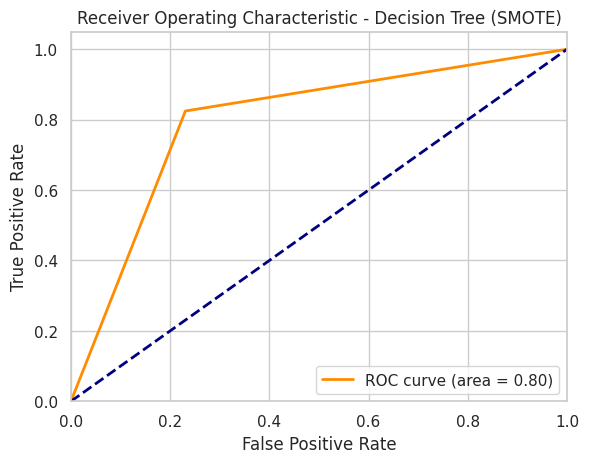

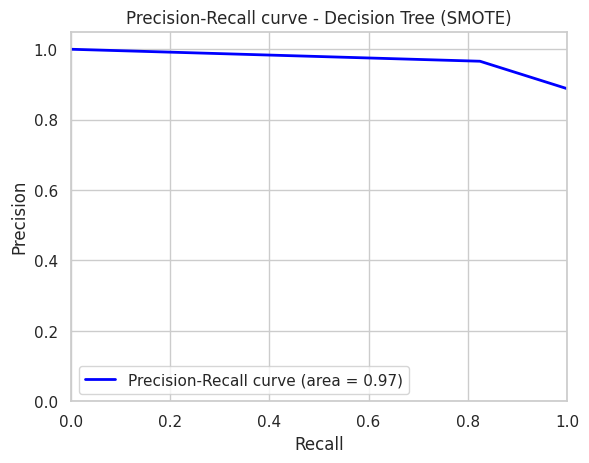

Performance Report for Random Forest (SMOTE):
              precision    recall  f1-score   support

           0       0.89      0.75      0.81     10437
           1       0.97      0.99      0.98     82820

    accuracy                           0.96     93257
   macro avg       0.93      0.87      0.90     93257
weighted avg       0.96      0.96      0.96     93257

ROC AUC Score for Random Forest (SMOTE): 0.9499524966868632


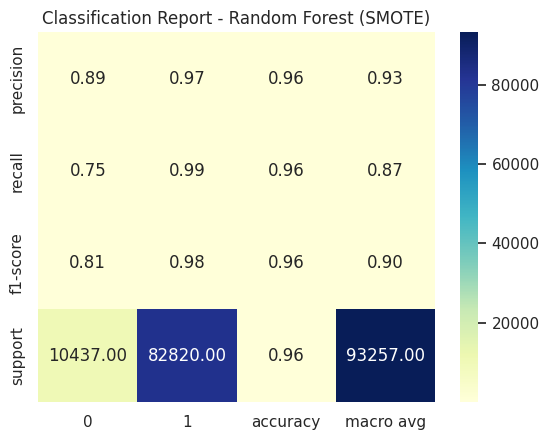

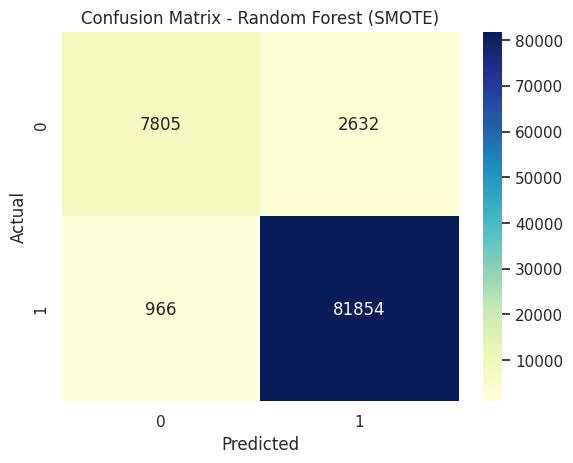

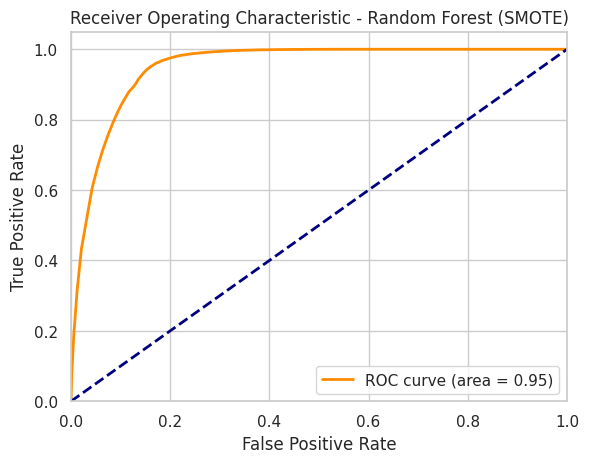

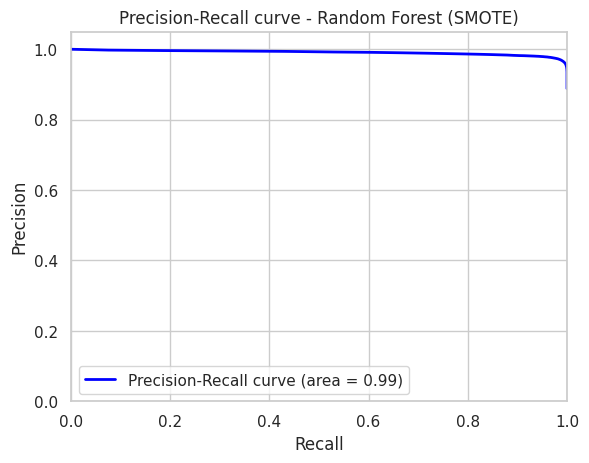

In [ ]:
# SMOTE
X_train_SMOTE, y_train_SMOTE = smote_resample(X_train, y_train)
train_and_evaluate_model(lr_model, X_train_SMOTE, y_train_SMOTE, X_test, y_test, "Logistic Regression (SMOTE)")
train_and_evaluate_model(dt_model, X_train_SMOTE, y_train_SMOTE, X_test, y_test, "Decision Tree (SMOTE)")
train_and_evaluate_model(rf_model, X_train_SMOTE, y_train_SMOTE, X_test, y_test, "Random Forest (SMOTE)")

## Tuning Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_manual_resampled, y_train_manual_resampled)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [ ]:
best_rf_model = rf_random.best_estimator_


In [ ]:
print(best_rf_model)

RandomForestClassifier(max_depth=30, n_estimators=300, random_state=42)


In [ ]:
# Mendapatkan hasil pencarian acak
random_search_results = rf_random.cv_results_

# Menampilkan semua parameter dan skor kinerja yang terkait
for mean_score, params in zip(random_search_results["mean_test_score"], random_search_results["params"]):
    print(f"Mean Test Score: {mean_score:.3f}, Hyperparameters: {params}")

Mean Test Score: 0.984, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Mean Test Score: 0.994, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Mean Test Score: 0.994, Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Mean Test Score: 0.885, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Mean Test Score: 0.885, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
Mean Test Score: 0.985, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 3

Mean Test Score: 0.984, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Mean Test Score: 0.994, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Mean Test Score: 0.994, Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Mean Test Score: 0.885, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Mean Test Score: 0.885, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
Mean Test Score: 0.985, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Mean Test Score: 0.975, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}
Mean Test Score: 0.886, Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Mean Test Score: 0.968, Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Mean Test Score: 0.991, Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}

### Evaluation Tuned Model

Performance Report for Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     10437
           1       0.97      1.00      0.98     82820

    accuracy                           0.97     93257
   macro avg       0.97      0.86      0.90     93257
weighted avg       0.97      0.97      0.96     93257

ROC AUC Score for Random Forest (Tuned): 0.959736535842046


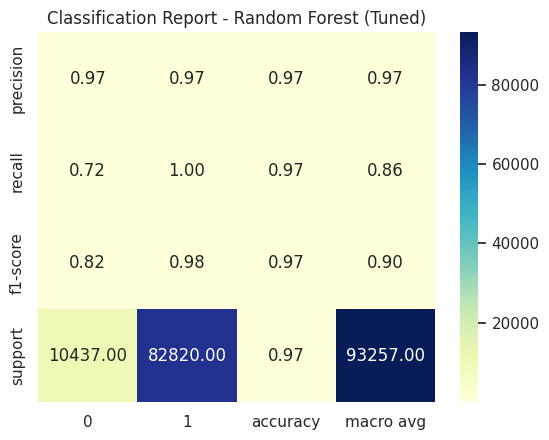

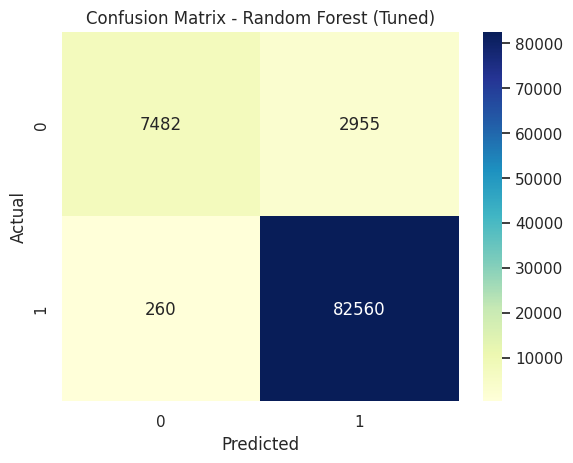

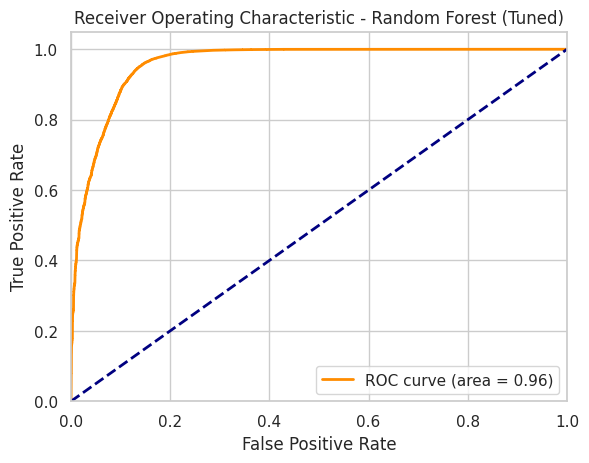

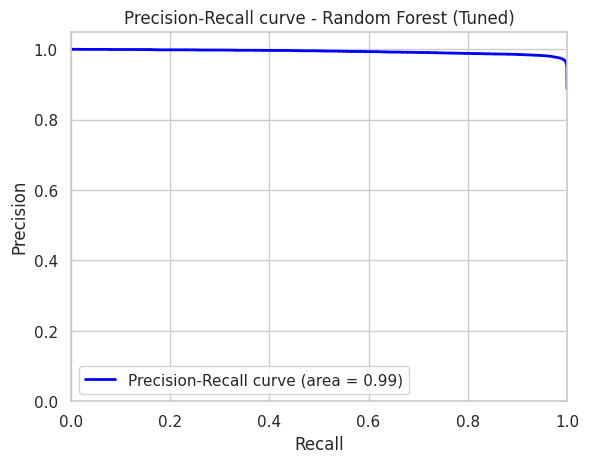

In [ ]:
train_and_evaluate_model(best_rf_model, X_train, y_train, X_test, y_test, "Random Forest (Tuned)")

Performance Report for Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     10437
           1       0.97      1.00      0.98     82820

    accuracy                           0.97     93257
   macro avg       0.97      0.86      0.90     93257
weighted avg       0.97      0.97      0.96     93257

ROC AUC Score for Random Forest (Tuned): 0.959736535842046

### Evaluation Of Manual Resampling

Performance Report for Random Forest TUned on (Manual Resampling):
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     10437
           1       0.97      0.99      0.98     82820

    accuracy                           0.97     93257
   macro avg       0.96      0.87      0.91     93257
weighted avg       0.97      0.97      0.97     93257

ROC AUC Score for Random Forest TUned on (Manual Resampling): 0.9627869324941032


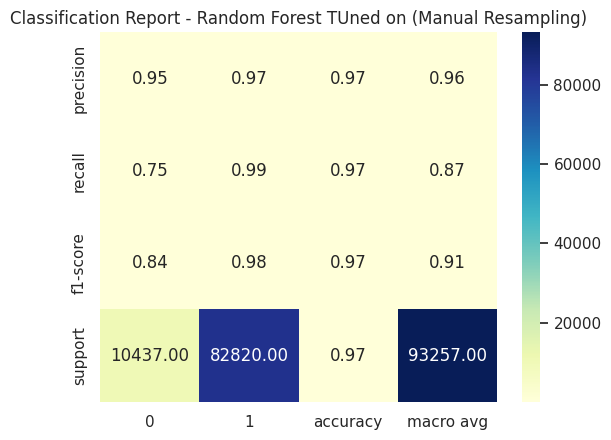

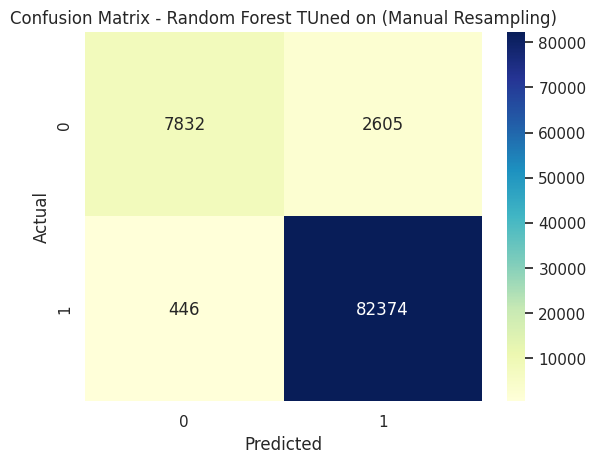

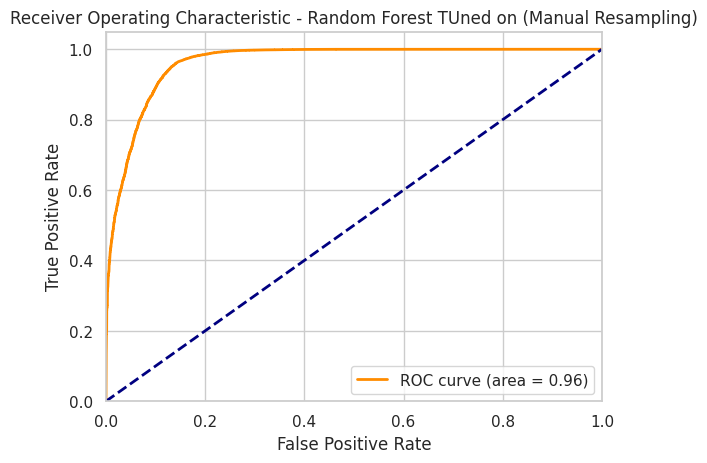

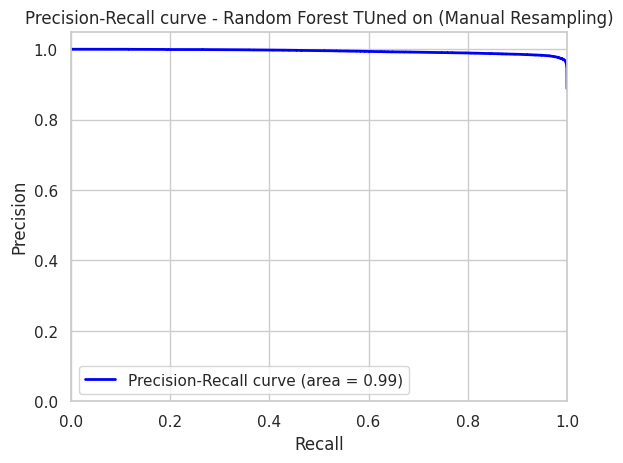

In [ ]:
train_and_evaluate_model(best_rf_model, X_train_manual_resampled, y_train_manual_resampled, X_test, y_test, "Random Forest TUned on (Manual Resampling)")

Performance Report for Random Forest TUned on (Manual Resampling):
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     10437
           1       0.97      0.99      0.98     82820

    accuracy                           0.97     93257
   macro avg       0.96      0.87      0.91     93257
weighted avg       0.97      0.97      0.97     93257

ROC AUC Score for Random Forest TUned on (Manual Resampling): 0.9627869324941032

### Evaluation of SMOTE

Performance Report for Random Forest Tuned on (SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     10437
           1       0.97      0.99      0.98     82820

    accuracy                           0.96     93257
   macro avg       0.93      0.87      0.90     93257
weighted avg       0.96      0.96      0.96     93257

ROC AUC Score for Random Forest Tuned on (SMOTE): 0.9526083815134224


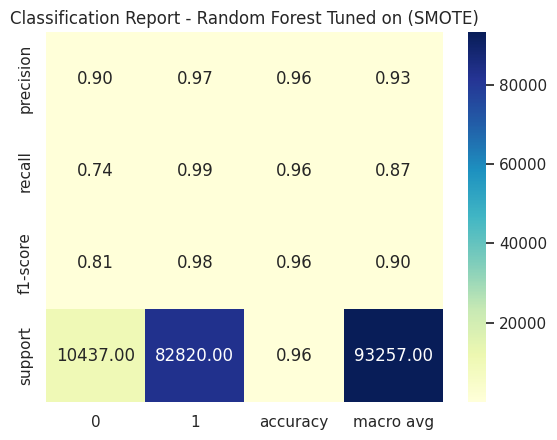

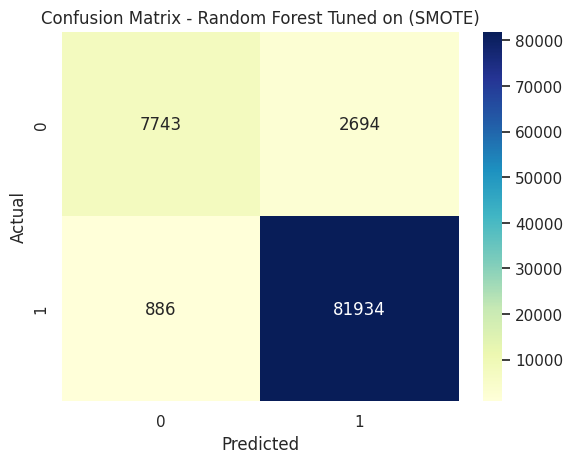

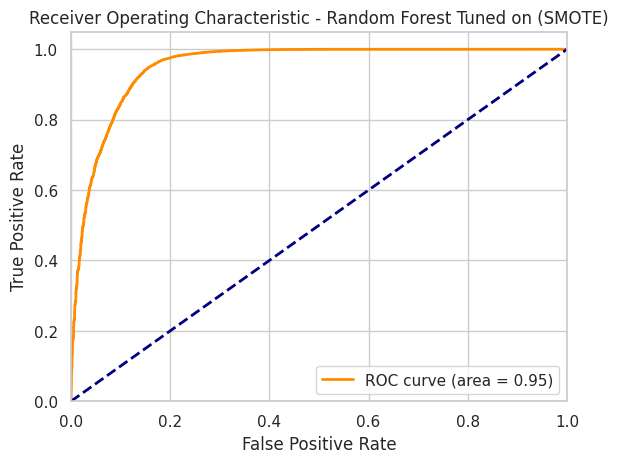

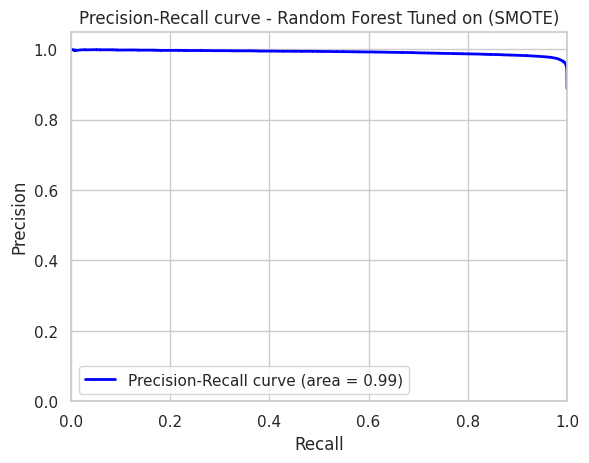

In [ ]:
train_and_evaluate_model(best_rf_model, X_train_SMOTE, y_train_SMOTE, X_test, y_test, "Random Forest Tuned on (SMOTE)")

Performance Report for Random Forest Tuned on (SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     10437
           1       0.97      0.99      0.98     82820

    accuracy                           0.96     93257
   macro avg       0.93      0.87      0.90     93257
weighted avg       0.96      0.96      0.96     93257

ROC AUC Score for Random Forest Tuned on (SMOTE): 0.9526083815134224

## Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Melakukan cross-validation pada model terbaik dengan fokus pada recall
cv_scores_recall = cross_val_score(best_rf_model, X_train_manual_resampled, y_train_manual_resampled, cv=5, scoring='recall')
print(f"Cross-Validation Recall Scores: {cv_scores_recall}")
print(f"Mean Recall Score: {cv_scores_recall.mean():.3f}, Std Dev: {cv_scores_recall.std():.3f}")


Cross-Validation Recall Scores: [0.99228749 0.9914121  0.99187998 0.99177433 0.99239303]
Mean Recall Score: 0.992, Std Dev: 0.000


Cross-Validation Recall Scores: [0.99228749 0.9914121  0.99187998 0.99177433 0.99239303]
Mean Recall Score: 0.992, Std Dev: 0.000

## Feature Importance

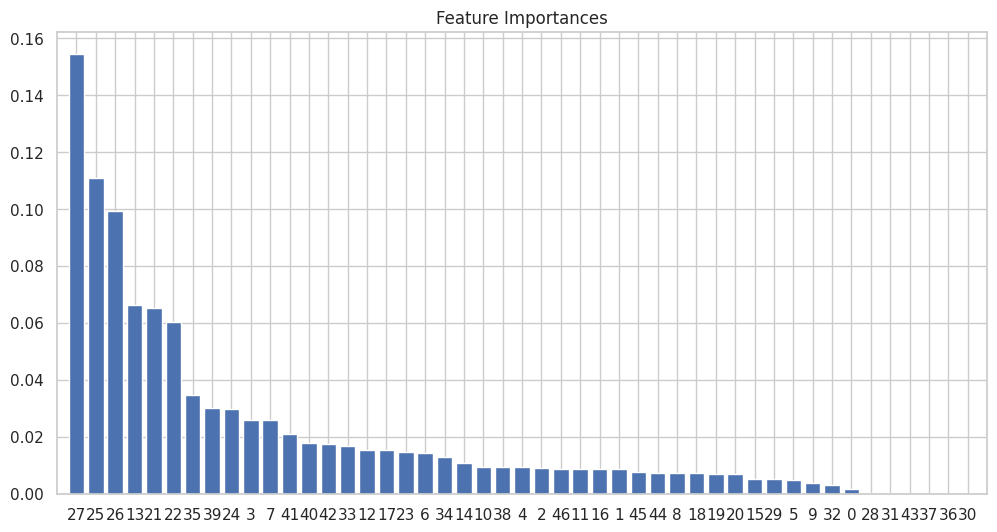

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan fitur penting
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [ ]:
feature_names = X_train.columns  # Assuming X_train is a DataFrame
important_features = [feature_names[i] for i in indices[:10]]  # Menampilkan 10 fitur teratas
print("Fitur-fitur penting: ", important_features)


Fitur-fitur penting:  ['last_pymnt_amnt', 'recoveries', 'collection_recovery_fee', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'home_ownership_MORTGAGE', 'home_ownership_RENT', 'total_rec_late_fee', 'int_rate']


## Experiment with Other Resampling Techniques

Fitur-fitur penting:  ['last_pymnt_amnt', 'recoveries', 'collection_recovery_fee', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'home_ownership_MORTGAGE', 'home_ownership_RENT', 'total_rec_late_fee', 'int_rate']


Performance Report for Random Forest Tuned on (ADASYN):
              precision    recall  f1-score   support

           0       0.88      0.74      0.80     10437
           1       0.97      0.99      0.98     82820

    accuracy                           0.96     93257
   macro avg       0.93      0.86      0.89     93257
weighted avg       0.96      0.96      0.96     93257

ROC AUC Score for Random Forest Tuned on (ADASYN): 0.9522777128034245


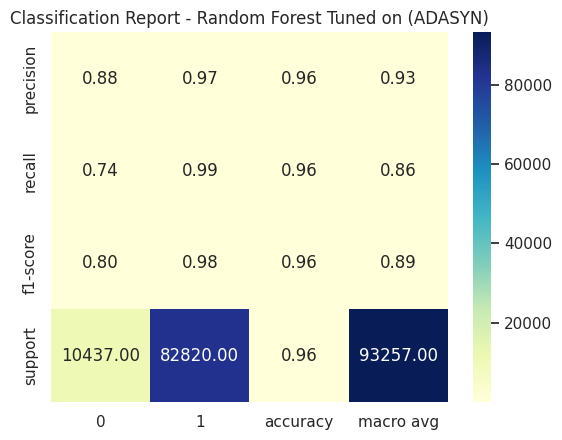

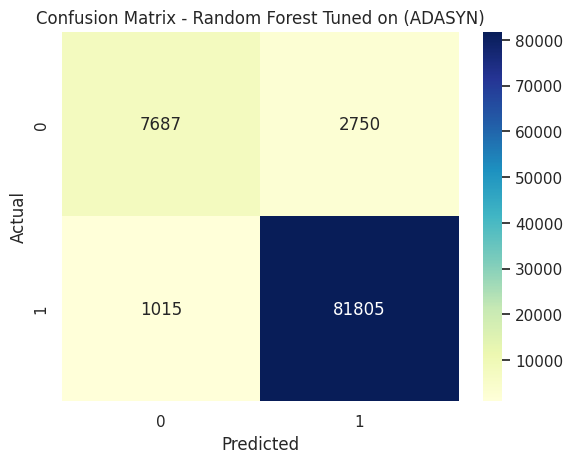

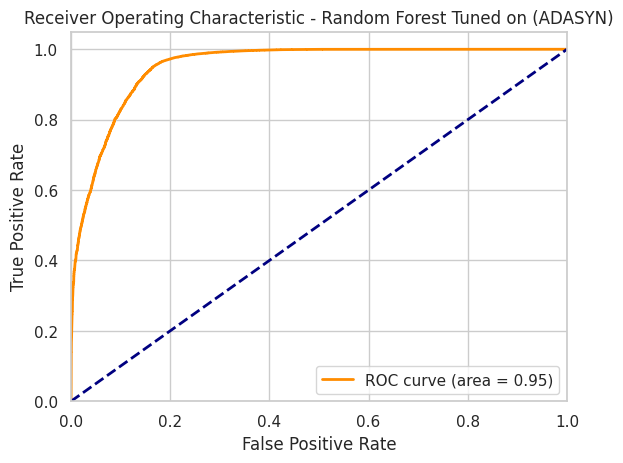

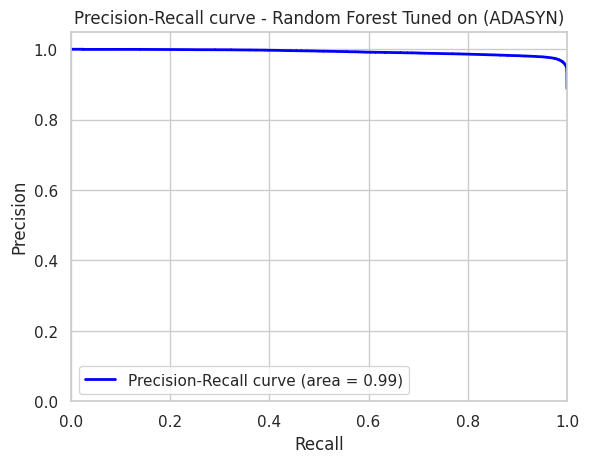

Performance Report for Random Forest Tuned on (NearMiss):
              precision    recall  f1-score   support

           0       0.16      0.90      0.27     10437
           1       0.97      0.38      0.55     82820

    accuracy                           0.44     93257
   macro avg       0.56      0.64      0.41     93257
weighted avg       0.88      0.44      0.52     93257

ROC AUC Score for Random Forest Tuned on (NearMiss): 0.812282677100077


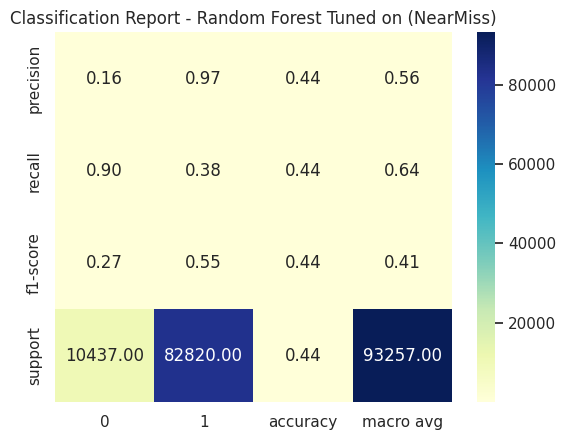

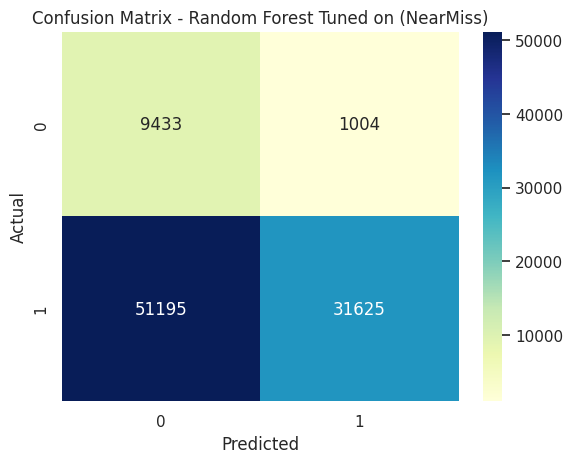

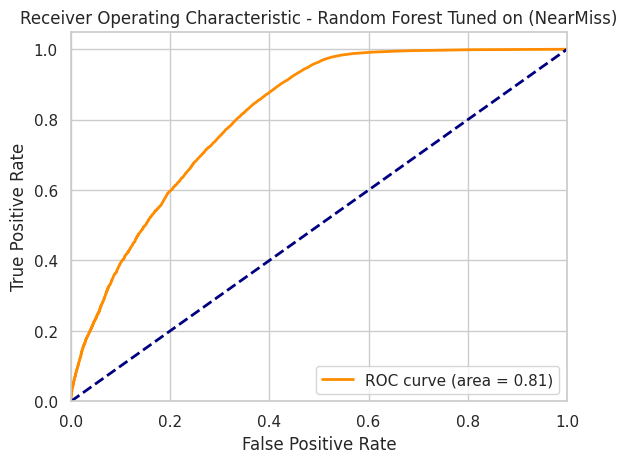

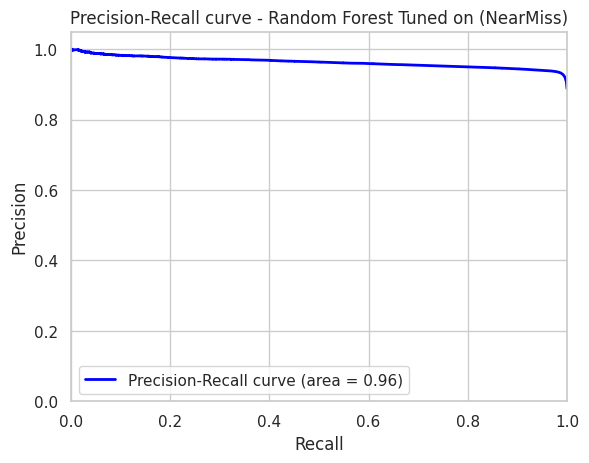

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import NearMiss

# ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
train_and_evaluate_model(best_rf_model, X_train_adasyn, y_train_adasyn, X_test, y_test, "Random Forest Tuned on (ADASYN)")

# NearMiss
nearmiss = NearMiss()
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)
train_and_evaluate_model(best_rf_model, X_train_nearmiss, y_train_nearmiss, X_test, y_test, "Random Forest Tuned on (NearMiss)")


Performance Report for Random Forest Tuned on (ADASYN):
              precision    recall  f1-score   support

           0       0.88      0.74      0.80     10437
           1       0.97      0.99      0.98     82820

    accuracy                           0.96     93257
   macro avg       0.93      0.86      0.89     93257
weighted avg       0.96      0.96      0.96     93257

ROC AUC Score for Random Forest Tuned on (ADASYN): 0.9522777128034245

Performance Report for Random Forest Tuned on (NearMiss):
              precision    recall  f1-score   support

           0       0.16      0.90      0.27     10437
           1       0.97      0.38      0.55     82820

    accuracy                           0.44     93257
   macro avg       0.56      0.64      0.41     93257
weighted avg       0.88      0.44      0.52     93257

ROC AUC Score for Random Forest Tuned on (NearMiss): 0.812282677100077

## Application of PCA for Dimensionality Reduction

Performance Report for Random Forest Tuned on (PCA):
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10437
           1       0.97      0.96      0.97     82820

    accuracy                           0.94     93257
   macro avg       0.84      0.86      0.85     93257
weighted avg       0.94      0.94      0.94     93257

ROC AUC Score for Random Forest Tuned on (PCA): 0.9394937500255961


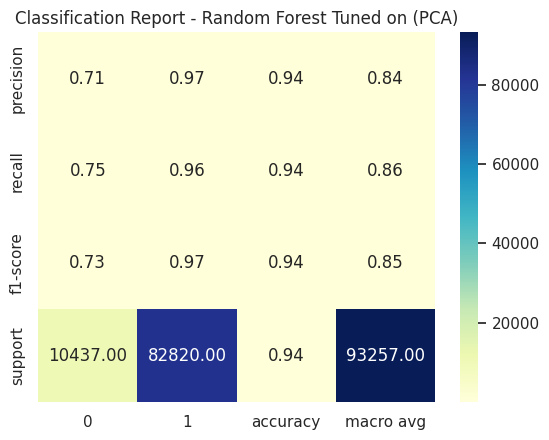

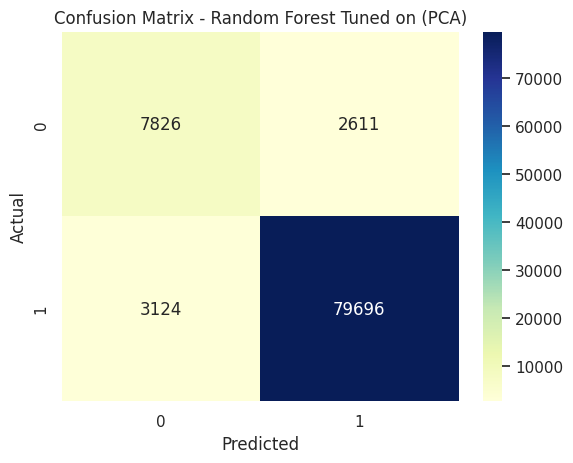

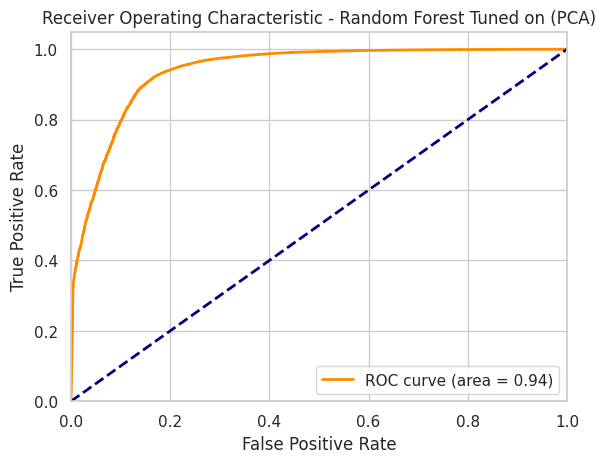

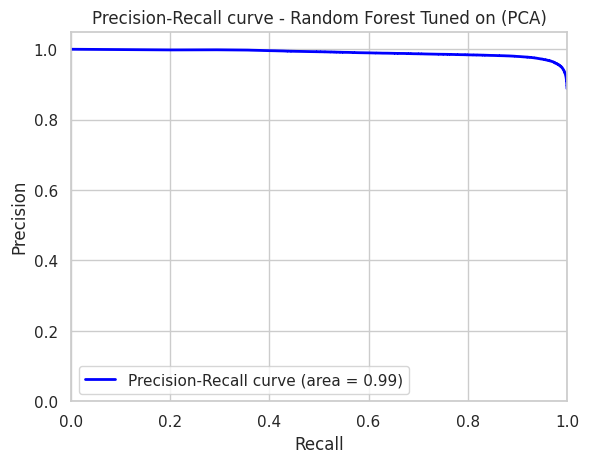

In [ ]:
from sklearn.decomposition import PCA

# Menerapkan PCA
pca = PCA(n_components=0.95)  # mempertahankan 95% varians
X_train_pca = pca.fit_transform(X_train_manual_resampled)
X_test_pca = pca.transform(X_test)

# Melatih model dengan data PCA
best_rf_model.fit(X_train_pca, y_train_manual_resampled)
train_and_evaluate_model(best_rf_model, X_train_pca, y_train_manual_resampled, X_test_pca, y_test, "Random Forest Tuned on (PCA)")


Performance Report for Random Forest Tuned on (PCA):
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10437
           1       0.97      0.96      0.97     82820

    accuracy                           0.94     93257
   macro avg       0.84      0.86      0.85     93257
weighted avg       0.94      0.94      0.94     93257

ROC AUC Score for Random Forest Tuned on (PCA): 0.9394937500255961